# Machine Learning Master Notes 22B - Logistics Softmax Regression and Regularization (Module Test)

<div class="alert alert-block alert-info">
<b>Note:</b> The code in this note is the same as previous note. The differences is that all the code are store in module and NOT locally.
</div>

### Prepare Environment

In [1]:
%matplotlib inline


# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Multiclass
from sklearn import multiclass
from sklearn.multiclass import OneVsRestClassifier

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

## Pytorch
import torch

## Tensorflow
import tensorflow as tf

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV3 as my
import testFile as test



2024-11-02 11:00:49.912916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preparation of Sample Data

#### Example 1

In [2]:
df1 = pd.read_csv('./data/logisticsSample2.txt', header=None)
df1.columns = ['x0','x1','y']
df1.head()

,x0,x1,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
X1_train = df1[['x0','x1']]
X1_train.head()

,x0,x1
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [4]:
y1_train = df1[['y']]
y1_train.head()

,y
0,1
1,1
2,1
3,1
4,1


In [5]:
X1_train = X1_train.to_numpy()
y1_train = y1_train.to_numpy()

In [6]:
X1_train_positive = X1_train[y1_train.flatten() == 1]
X1_train_negative = X1_train[y1_train.flatten() == 0]

In [7]:
X1_train_positive[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

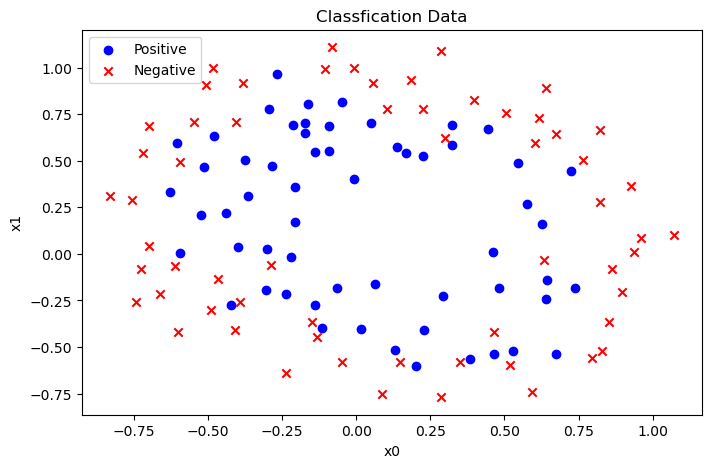

In [8]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_positive[:,0], X1_train_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_negative[:,0], X1_train_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

#### Example 2

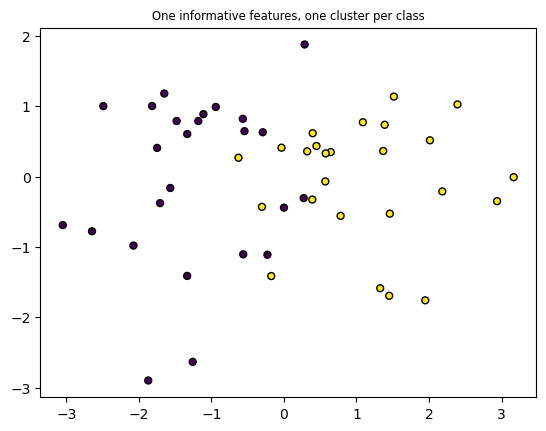

In [9]:
plt.title("One informative features, one cluster per class", fontsize="small")
X2, y2 = make_classification(
    n_samples=50, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=197
)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=y2, s=25, edgecolor="k")
plt.show()

#### Example 3

In [10]:
X3, y3 = make_classification(n_samples=50, n_features = 2, n_informative = 2, n_redundant=0, n_repeated=0, 
                             n_classes=4, n_clusters_per_class = 1, class_sep=0.9, random_state=124)

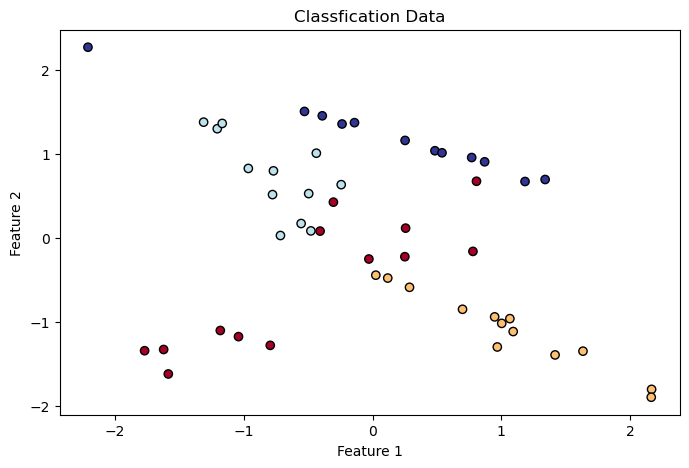

In [11]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

#### Example 4

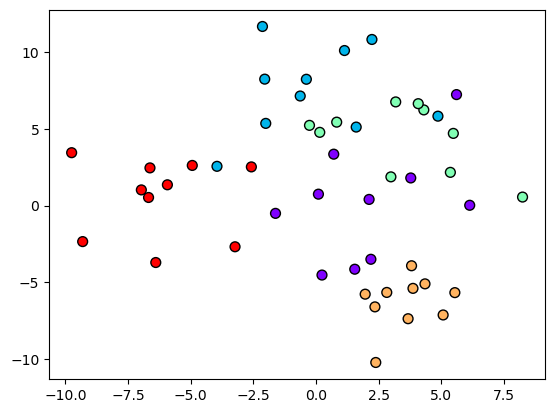

In [12]:
X4, y4 = make_blobs(n_samples=50, n_features=2, centers=5, cluster_std=3, random_state=88)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='rainbow', edgecolors='k', s=50)
plt.show()

#### Example 5

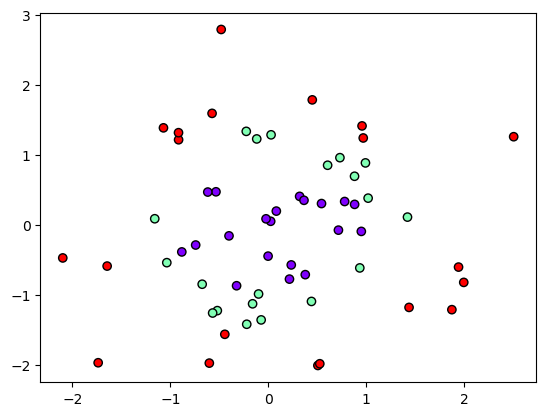

In [13]:
X5, y5 = make_gaussian_quantiles(n_samples=60, n_features=2, n_classes=3, random_state=134)
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap='rainbow', edgecolor='k')
plt.show()

## Addressing Overfitting and Underfitting Problem

To address overfitting the solution are as below:
    
- **Collect more data**
- **Another method is to use less features by reducing the number of features especially polynomial features. If our model still overfit, then we may consider reducing the number of features we have. We can choose only few of the most relevant features.**
- **The third method is to use <u>Regularization</u>. This is a technique that will reduce the weights of features/parameters so that it is too small (such as 0.00001) to be significantly meaningful while we can still keep these features.**

To address underfitting the solution are as below:

- **We need to redo feature selection and select the features that are most relevant to the outcome.**
- **We can also increase the complexity of the features by performing feature engineering and increase its polynomial complexity.** 
- **Collect more data**
- **Select model that are capable of detecting complex relationship.**
- **Increase the number of iterations and use learning curve to check for convergence.**
- **We might need to tune back regularization a bit if such technique has been applied too aggressively.**

## Logistics Softmax Regression with Regularization 

Hypothesis: 
$$z = f_{w,b}(x) = f(x)$$
$$f(x) = b + wx$$
Softmax Function:
$$\sigma(z)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
$$P(y=k|x)=\frac{e^{z_k}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
where:
- $i$ is each element in a training example

Then:
$$P(y=k|x)=\frac{e^{f(x)_k}}{\sum\limits_{j=1}^{k}e^{f(x)_j}}$$
$$P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$



Categorical-Cross-Entropy Loss Function
$$Loss_{Categorical} = - \sum\limits_{k=1}^{K}y_{k}log(\hat{y}_k)$$

Categorical-Cross-Entropy Cost Function
<font color='blue'>
$$\text{Cost Function}_{Categorical} = - \frac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}y_{ik}log(\hat{y}_{ik}) + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
</font>
$$ $$
Sparse-Categorical-Cross-Entropy Loss Function
$$Loss_{Sparse} = - log(\hat{y}_y)$$

Sparse-Categorical-Cross-Entropy Cost Function
<font color='blue'>
$$\text{Cost Function}_{Sparse} = - \frac{1}{m}\sum\limits_{i=1}^{m}log(\hat{y}_{y_{i}}) + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
</font>

**Cost Function Regularization Term**
<font color='blue'>
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
</font>

Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives with **NO** regularization: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)}) \\
\end{align}
$$

where:
$$\hat{y} = P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$

Implementation of Gradient Descent with **NO** regularization:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)})  \newline \rbrace
\end{align*}$$


<font color='blue'>
    
**Full Implementation of Gradient Descent with Regularization:**
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w}  -  \alpha \left[ \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)})\vec{X}^{(i)}  + \frac{\lambda}{m} \vec{w} \right] \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y} - y^{(i)})  \newline \rbrace
\end{align*}$$

$$$$
<font color='blue'>
**Gradient Descent Regularization Term:** $$\frac {\lambda}{m} \vec{w}$$
</font>


## Testing Module Functions

### Testing Softmax Cost Function

In [14]:
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels
k = len(np.unique(y)) 
m,n = X.shape
one_hot_convert = preprocessing.OneHotEncoder()
y_one_hot = one_hot_convert.fit_transform(y.reshape(-1,1)).toarray()
W = np.zeros((n,k))
b = np.zeros((1,k))

**Categorical Cross Entropy**

In [15]:
db, dW = my.categoricalSoftmaxGradient(X,y_one_hot,W,b)
dW

array([[ 0.3       , -0.2       , -0.1       ],
       [ 0.23333333, -0.06666667, -0.16666667]])

**Sparse Categorical Cross Entropy**

In [16]:
db_sp, dW_sp = my.sparseCategoricalSoftmaxGradient(X,y,W,b)
dW_sp

array([[ 0.3       , -0.2       , -0.1       ],
       [ 0.23333333, -0.06666667, -0.16666667]])

**Expected Result**:

**[[ 0.3,          -0.2,          -0.1       ]**

**[ 0.23333333, -0.06666667, -0.16666667]]**

**Categorical Cross Entropy**

In [17]:
db

array([[-0.06666667, -0.06666667,  0.13333333]])

**Sparse Categorical Cross Entropy**

In [18]:
db_sp

array([[-0.06666667, -0.06666667,  0.13333333]])

**Expected Result:**

**[-0.06666667, -0.06666667,  0.13333333]**

**Categorical Cross Entropy**

In [19]:
my.categoricalCrossEntropyCost(X,y_one_hot,W,b,0)

1.0986122886681098

**Sparse Categorical Cross Entropy**

In [20]:
my.sparseCategoricalCrossEntropyCost(X,y,W,b,0)

1.0986122886681098

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
Loss: 1.09861229
```

### Testing Gradient Descent

**The following code provided by ChatGPT**

In [21]:
import numpy as np

# Softmax function
def softmax_gpt(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function with L2 regularization
def cross_entropy_loss(y_true, y_pred, W, lambda_l2):
    m = y_true.shape[0]
    # Standard cross-entropy loss
    cross_entropy = -np.sum(y_true * np.log(y_pred + 1e-10)) / m
    #print('cost', cross_entropy)
    # L2 regularization term
    l2_reg = (lambda_l2 / 2) * np.sum(W ** 2)
    # Total loss
    return cross_entropy + l2_reg

# Gradient of the loss with respect to weights
def compute_gradients(X, y_true, y_pred, W, lambda_l2):
    m = X.shape[0]
    dz = y_pred - y_true  # Difference between prediction and actual
    dW = np.dot(X.T, dz) / m  # Gradient with respect to weights
    db = np.sum(dz, axis=0) / m  # Gradient with respect to biases
    # Add L2 regularization to weight gradients
    dW += lambda_l2 * W
    return dW, db

# Gradient descent function with L2 regularization
def gradient_descent(X, y, num_classes, learning_rate=0.01, epochs=1000, lambda_l2=0.01):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights as zeros
    b = np.zeros((1, num_classes))  # Initialize biases as zeros

    for epoch in range(epochs):
        # Compute linear logits
        z = np.matmul(X, W) + b
        
        # Apply softmax to get probabilities
        y_pred = softmax_gpt(z)

        # print(y_pred.shape)
        # print('y',y.shape)
        # print('W',W.shape)
        # Compute loss (cross-entropy + L2 regularization)
        loss = cross_entropy_loss(y, y_pred, W, lambda_l2)
        
        # Compute gradients (with L2 regularization for weights)
        dW, db = compute_gradients(X, y, y_pred, W, lambda_l2)
        
        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        
        # Print loss every 100 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return W, b



#### Results on 1 iteration

In [22]:
# Example usage
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels

# One-hot encoding the labels
y_one_hot = np.eye(3)[y]

# Run gradient descent with L2 regularization
W, b = gradient_descent(X, y_one_hot, num_classes=3, learning_rate=0.01, epochs=1, lambda_l2=0.01)


Epoch 0: Loss = 1.0986


In [23]:
W

array([[-0.003     ,  0.002     ,  0.001     ],
       [-0.00233333,  0.00066667,  0.00166667]])

In [24]:
b

array([[ 0.00066667,  0.00066667, -0.00133333]])

In [25]:
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels
k = len(np.unique(y)) 
y_one_hot = one_hot_convert.fit_transform(y.reshape(-1,1)).toarray()
W = np.zeros((n,k))
b = np.zeros((1,k))

In [26]:
W, b, _, _, _ = my.categorical_softmax_gradient_descent(X, y_one_hot, k, init_coefficient = None, init_intercept= None, iterations=1, alpha=0.01, 
                                         reguLambda = 0.01, printProgress=False, printProgressRate = 1000, storeHistory=False)

iteration 0: cost = 1.096100e+00: intercept = [[ 0.00066667  0.00066667 -0.00133333]]: weights = [[-0.003      -0.00233333]
 [ 0.002       0.00066667]
 [ 0.001       0.00166667]]
best w [[-0.003     0.002     0.001   ]
 [-0.002333  0.000667  0.001667]]
best b [[ 0.000667  0.000667 -0.001333]]


In [27]:
W, b, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X, y, k, init_coefficient = None, init_intercept= None, iterations=1, alpha=0.01, 
                                         reguLambda = 0.01, printProgress=False, printProgressRate = 1000, storeHistory=False)

iteration 0: cost = 1.096100e+00: intercept = [[ 0.00066667  0.00066667 -0.00133333]]: weights = [[-0.003      -0.00233333]
 [ 0.002       0.00066667]
 [ 0.001       0.00166667]]
best w [[-0.003     0.002     0.001   ]
 [-0.002333  0.000667  0.001667]]
best b [[ 0.000667  0.000667 -0.001333]]


<details>
<summary>
    <b>Expected Answer (alpha = 0.01)<b>
</summary>

``` 
Epoch 0: Loss = 1.0961
W [[-0.003       0.002       0.001     ]
 [-0.00233333  0.00066667  0.00166667]]
b [[ 0.00066667  0.00066667 -0.00133333]]
```

#### Results on Full Run

In [28]:
# Example usage
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels

# One-hot encoding the labels
y_one_hot = np.eye(3)[y]

# Run gradient descent with L2 regularization
W, b = gradient_descent(X, y_one_hot, num_classes=3, learning_rate=0.01, epochs=10000, lambda_l2=0.01)


Epoch 0: Loss = 1.0986
Epoch 1000: Loss = 0.5973
Epoch 2000: Loss = 0.4496
Epoch 3000: Loss = 0.3783
Epoch 4000: Loss = 0.3350
Epoch 5000: Loss = 0.3052
Epoch 6000: Loss = 0.2833
Epoch 7000: Loss = 0.2664
Epoch 8000: Loss = 0.2531
Epoch 9000: Loss = 0.2423


In [29]:
W, b, _, _, _ = my.categorical_softmax_gradient_descent(X, y_one_hot, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=0.01, reguLambda = 0.01)

iteration 9999: cost = 1.697355e-01: intercept = [[ 4.5871332  0.2018497 -4.7889829]]: weights = [[-2.5597435  -0.88539871]
 [ 1.44134397 -0.65355032]
 [ 1.11839953  1.53894903]]
best w [[-2.559744  1.441344  1.1184  ]
 [-0.885399 -0.65355   1.538949]]
best b [[ 4.587133  0.20185  -4.788983]]


In [30]:
y_pred, y_proba = my.softmax_predict(X,W,b)
y_pred

array([0, 1, 2, 1, 0])

In [31]:
print('Train Accuracy: %f'%(np.mean(y_pred.reshape(-1,1) == np.array(y).reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [32]:
W_sp, b_sp, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X, y, k, init_coefficient = None, init_intercept= None, iterations=10000, 
                                                                  alpha=0.01, reguLambda = 0.01)

iteration 9999: cost = 1.697355e-01: intercept = [[ 4.5871332  0.2018497 -4.7889829]]: weights = [[-2.5597435  -0.88539871]
 [ 1.44134397 -0.65355032]
 [ 1.11839953  1.53894903]]
best w [[-2.559744  1.441344  1.1184  ]
 [-0.885399 -0.65355   1.538949]]
best b [[ 4.587133  0.20185  -4.788983]]


In [33]:
y_pred_sp, y_proba_sp = my.softmax_predict(X,W_sp,b_sp)
y_pred_sp

array([0, 1, 2, 1, 0])

In [34]:
print('Train Accuracy: %f'%(np.mean(y_pred_sp.reshape(-1,1) == np.array(y).reshape(-1,1)) * 100))

Train Accuracy: 100.000000


### Testing Gradient Descent with Example 1:

The training on example 1 is extensive, so we take only 30 samples:

In [35]:
X1_sample = df1.sample(n = 20, random_state=136)

In [36]:
X1_sample.shape

(20, 3)

In [37]:
X1_sample.head()

,x0,x1,y
77,0.35081,-0.579680,0
43,0.46025,0.012427,1
98,0.63882,0.889620,0
49,0.32200,0.692250,1
80,0.14919,-0.579680,0


In [38]:
X1_train_sam = X1_sample[["x0","x1"]].to_numpy()
y1_train_sam = X1_sample[["y"]].to_numpy()

In [39]:
X1_train_sam_positive = X1_train_sam[y1_train_sam.flatten() == 1]
X1_train_sam_negative = X1_train_sam[y1_train_sam.flatten() == 0]

In [40]:
X1_train_sam_positive.shape

(11, 2)

In [41]:
X1_train_sam_negative.shape

(9, 2)

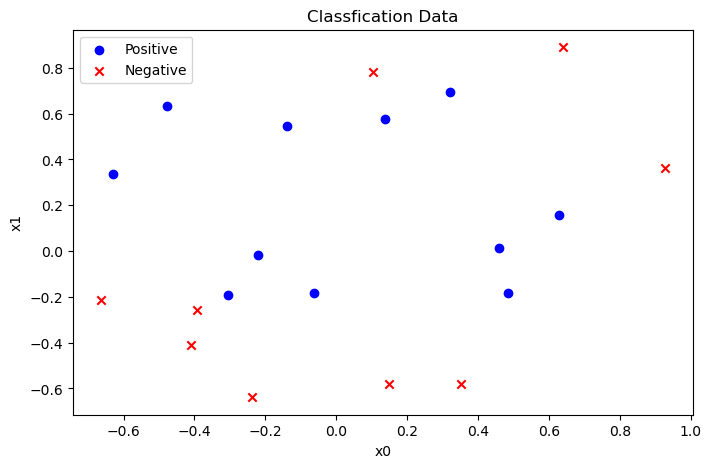

In [42]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_sam_positive[:,0], X1_train_sam_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_sam_negative[:,0], X1_train_sam_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

In [43]:
# One-hot encoding the labels
y_one_hot_sam = np.eye(2)[y1_train_sam.flatten()]

In [44]:
y_one_hot_sam.shape

(20, 2)

In [45]:
y1_train_sam.shape

(20, 1)

In [46]:
polynomial_features= PolynomialFeatures(degree=6,include_bias=False)
X1_sam_poly = polynomial_features.fit_transform(X1_train_sam)

In [47]:
X1_sam_poly.shape

(20, 27)

In [48]:
m,n = X1_sam_poly.shape
k = len(np.unique(y1_train_sam))
k

2

#### Testing with No regularization

In [49]:
# Run gradient descent without L2 regularization
W, b = gradient_descent(X1_sam_poly, y_one_hot_sam, num_classes=2, learning_rate=1, epochs=10000, lambda_l2=0)

Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.0626
Epoch 2000: Loss = 0.0409
Epoch 3000: Loss = 0.0317
Epoch 4000: Loss = 0.0263
Epoch 5000: Loss = 0.0226
Epoch 6000: Loss = 0.0200
Epoch 7000: Loss = 0.0179
Epoch 8000: Loss = 0.0163
Epoch 9000: Loss = 0.0150


In [50]:
prediction, proba = my.softmax_predict(X1_sam_poly, W, b)

print('Train Accuracy: %f'%(np.mean(prediction.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 100.000000


In [51]:
W1, b1, _, _, _ = my.categorical_softmax_gradient_descent(X1_sam_poly, y_one_hot_sam, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=1, reguLambda = 0.0)

iteration 9999: cost = 1.381940e-02: intercept = [[-5.79198737  5.79198737]]: weights = [[ -4.85736614  -9.61723593   5.33819609   4.92916706  13.04184235
    0.43149341  -5.00000482  -0.08430287   2.85247986   4.96262272
    3.19619512  -0.38604801   0.12783185   8.47976042   2.98963306
    0.19991275   0.4666574   -1.54919412   0.40865528   5.06557317
    3.97793043   2.02916479   0.43369173   0.31172142  -0.53353539
    0.0855795    5.98738565]
 [  4.85736614   9.61723593  -5.33819609  -4.92916706 -13.04184235
   -0.43149341   5.00000482   0.08430287  -2.85247986  -4.96262272
   -3.19619512   0.38604801  -0.12783185  -8.47976042  -2.98963306
   -0.19991275  -0.4666574    1.54919412  -0.40865528  -5.06557317
   -3.97793043  -2.02916479  -0.43369173  -0.31172142   0.53353539
   -0.0855795   -5.98738565]]
best w [[ -4.857366   4.857366]
 [ -9.617236   9.617236]
 [  5.338196  -5.338196]
 [  4.929167  -4.929167]
 [ 13.041842 -13.041842]
 [  0.431493  -0.431493]
 [ -5.000005   5.000005]
 

In [52]:
#Compute accuracy on our training set
myPrediction, proba = my.softmax_predict(X1_sam_poly, W1, b1)
print('Train Accuracy: %f'%(np.mean(myPrediction.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 100.000000


In [53]:
W2, b2, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X1_sam_poly, y1_train_sam, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=1, reguLambda = 0.0)

iteration 9999: cost = 1.381940e-02: intercept = [[-5.79198737  5.79198737]]: weights = [[ -4.85736614  -9.61723593   5.33819609   4.92916706  13.04184235
    0.43149341  -5.00000482  -0.08430287   2.85247986   4.96262272
    3.19619512  -0.38604801   0.12783185   8.47976042   2.98963306
    0.19991275   0.4666574   -1.54919412   0.40865528   5.06557317
    3.97793043   2.02916479   0.43369173   0.31172142  -0.53353539
    0.0855795    5.98738565]
 [  4.85736614   9.61723593  -5.33819609  -4.92916706 -13.04184235
   -0.43149341   5.00000482   0.08430287  -2.85247986  -4.96262272
   -3.19619512   0.38604801  -0.12783185  -8.47976042  -2.98963306
   -0.19991275  -0.4666574    1.54919412  -0.40865528  -5.06557317
   -3.97793043  -2.02916479  -0.43369173  -0.31172142   0.53353539
   -0.0855795   -5.98738565]]
best w [[ -4.857366   4.857366]
 [ -9.617236   9.617236]
 [  5.338196  -5.338196]
 [  4.929167  -4.929167]
 [ 13.041842 -13.041842]
 [  0.431493  -0.431493]
 [ -5.000005   5.000005]
 

In [54]:
#Compute accuracy on our training set
myPrediction2, proba = my.softmax_predict(X1_sam_poly, W2, b2)
print('Train Accuracy: %f'%(np.mean(myPrediction2.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 100.000000


#### Testing with Regularization

In [55]:
# Run gradient descent without L2 regularization
Wr, br = gradient_descent(X1_sam_poly, y_one_hot_sam, num_classes=2, learning_rate=0.1, epochs=10000, lambda_l2=0.3)

Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.6507
Epoch 2000: Loss = 0.6507
Epoch 3000: Loss = 0.6507
Epoch 4000: Loss = 0.6507
Epoch 5000: Loss = 0.6507
Epoch 6000: Loss = 0.6507
Epoch 7000: Loss = 0.6507
Epoch 8000: Loss = 0.6507
Epoch 9000: Loss = 0.6507


In [56]:
prediction, proba = my.softmax_predict(X1_sam_poly, Wr, br)
print('Train Accuracy: %f'%(np.mean(prediction.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 80.000000


In [57]:
W1r, b1r, _, _, _ = my.categorical_softmax_gradient_descent(X1_sam_poly, y_one_hot_sam, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=0.1, reguLambda = 5)

iteration 9999: cost = 6.257262e-01: intercept = [[-0.1739441  0.1739441]]: weights = [[-0.00270171 -0.23547291  0.07252079  0.1307393   0.15157666  0.04304636
   0.00113584  0.06265294 -0.02206552  0.07063484  0.06385966  0.03615957
   0.05163171  0.09568141  0.05364231  0.02240319  0.02929133  0.01539591
   0.04188974  0.03164299  0.06133647  0.03709492  0.01912665  0.02202525
   0.02245468  0.03483046  0.06687215]
 [ 0.00270171  0.23547291 -0.07252079 -0.1307393  -0.15157666 -0.04304636
  -0.00113584 -0.06265294  0.02206552 -0.07063484 -0.06385966 -0.03615957
  -0.05163171 -0.09568141 -0.05364231 -0.02240319 -0.02929133 -0.01539591
  -0.04188974 -0.03164299 -0.06133647 -0.03709492 -0.01912665 -0.02202525
  -0.02245468 -0.03483046 -0.06687215]]
best w [[-0.002702  0.002702]
 [-0.235473  0.235473]
 [ 0.072521 -0.072521]
 [ 0.130739 -0.130739]
 [ 0.151577 -0.151577]
 [ 0.043046 -0.043046]
 [ 0.001136 -0.001136]
 [ 0.062653 -0.062653]
 [-0.022066  0.022066]
 [ 0.070635 -0.070635]
 [ 0.0

In [58]:
#Compute accuracy on our training set
myPrediction, proba = my.softmax_predict(X1_sam_poly, W1r, b1r)
print('Train Accuracy: %f'%(np.mean(myPrediction.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 80.000000


In [59]:
W2r, b2r, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X1_sam_poly, y1_train_sam, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=0.1, reguLambda = 5)

iteration 9999: cost = 6.257262e-01: intercept = [[-0.1739441  0.1739441]]: weights = [[-0.00270171 -0.23547291  0.07252079  0.1307393   0.15157666  0.04304636
   0.00113584  0.06265294 -0.02206552  0.07063484  0.06385966  0.03615957
   0.05163171  0.09568141  0.05364231  0.02240319  0.02929133  0.01539591
   0.04188974  0.03164299  0.06133647  0.03709492  0.01912665  0.02202525
   0.02245468  0.03483046  0.06687215]
 [ 0.00270171  0.23547291 -0.07252079 -0.1307393  -0.15157666 -0.04304636
  -0.00113584 -0.06265294  0.02206552 -0.07063484 -0.06385966 -0.03615957
  -0.05163171 -0.09568141 -0.05364231 -0.02240319 -0.02929133 -0.01539591
  -0.04188974 -0.03164299 -0.06133647 -0.03709492 -0.01912665 -0.02202525
  -0.02245468 -0.03483046 -0.06687215]]
best w [[-0.002702  0.002702]
 [-0.235473  0.235473]
 [ 0.072521 -0.072521]
 [ 0.130739 -0.130739]
 [ 0.151577 -0.151577]
 [ 0.043046 -0.043046]
 [ 0.001136 -0.001136]
 [ 0.062653 -0.062653]
 [-0.022066  0.022066]
 [ 0.070635 -0.070635]
 [ 0.0

In [60]:
#Compute accuracy on our training set
myPrediction2r, proba = my.softmax_predict(X1_sam_poly, W2r, b2r)
print('Train Accuracy: %f'%(np.mean(myPrediction2r.reshape(-1,1) == np.array(y1_train_sam)) * 100))

Train Accuracy: 80.000000


## SciKit Learn Logistics Regression and Regularization

In SciKit Learn, `LogisticsRegression()` has a default L2 penalty. However, we can change to L1 penalty or no penalty depending on our needs. Please note that different solver supports different type of penalty. Please refer to the table below. Please also be aware that SciKit Learn will change their supports on different solvers and penalty. Please consult the official documentation for the most updated information.

|Solver|Supported Penalty|
|---|---|
|‘lbfgs’|‘l2’, None|
|‘liblinear’|‘l1’, ‘l2’|
|‘newton-cg’|‘l2’, None|
|‘newton-cholesky’|‘l2’, None|
|‘sag’|‘l2’, None|
|‘saga’|‘elasticnet’, ‘l1’, ‘l2’, None|

## Application of Softmax Regression with Regularization in Example 1

Due to the complexity of oeverfitting, we will reduce the sample size to a more managable number.

In [61]:
X1_sample = df1.sample(n = 40, random_state=133)

In [62]:
X1_train_sam = X1_sample[["x0","x1"]].to_numpy()
y1_train_sam = X1_sample[["y"]].to_numpy()

In [63]:
X1_train_sam_positive = X1_train_sam[y1_train_sam.flatten() == 1]
X1_train_sam_negative = X1_train_sam[y1_train_sam.flatten() == 0]

In [64]:
X1_train_sam.shape

(40, 2)

In [65]:
y1_train_sam.shape

(40, 1)

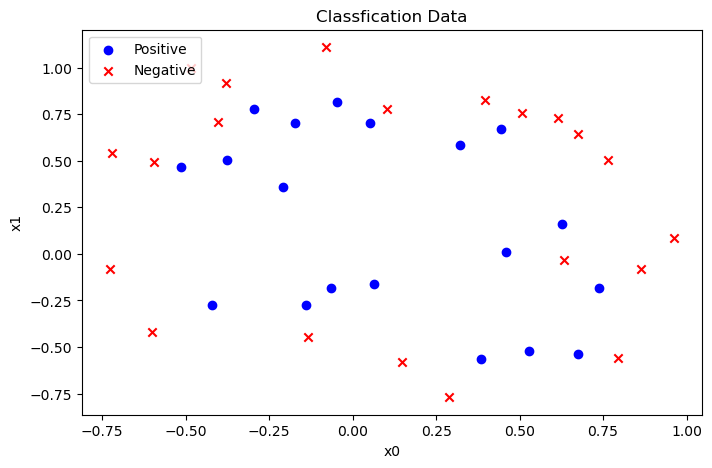

In [66]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_sam_positive[:,0], X1_train_sam_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_sam_negative[:,0], X1_train_sam_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

### Underfitting

In [67]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000))
]

losPipe11 = Pipeline(stepsLogisticsRegression)

losPipe11.fit(X1_train_sam, np.ravel(y1_train_sam))

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, penalty=None))])

In [68]:
losPipe11.score(X1_train_sam, np.ravel(y1_train_sam))

0.55

In [69]:
losPipe11.predict(X1_train_sam)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [70]:
x_min, x_max = X1_train_sam[:,0].min() - 1, X1_train_sam[:,0].max() + 1
y_min, y_max = X1_train_sam[:,1].min() - 1, X1_train_sam[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.001)
x2grid = np.arange(y_min, y_max, 0.001)
xx, yy = np.meshgrid(x1grid,x2grid)
Z11 = losPipe11.predict(np.c_[xx.ravel(), yy.ravel()])
Z11 = Z11.reshape(xx.shape)

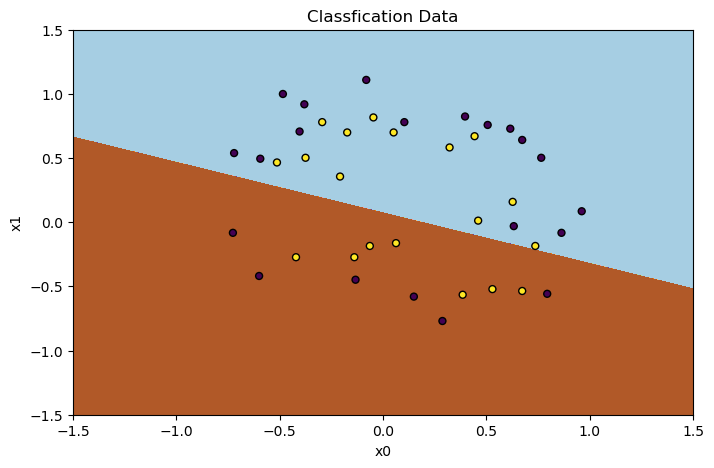

In [71]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z11, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:,0], X1_train_sam[:,1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [72]:
degree = 20
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe12 = Pipeline(stepsLogisticsRegression)

losPipe12.fit(X1_train_sam, np.ravel(y1_train_sam))

Pipeline(steps=[('poly', PolynomialFeatures(degree=20, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [73]:
losPipe12.score(X1_train_sam, np.ravel(y1_train_sam))

1.0

In [74]:
x_min, x_max = X1_train_sam[:,0].min() - 1, X1_train_sam[:,0].max() + 1
y_min, y_max = X1_train_sam[:,1].min() - 1, X1_train_sam[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z12 = losPipe12.predict(np.c_[xx.ravel(), yy.ravel()])
Z12 = Z12.reshape(xx.shape)

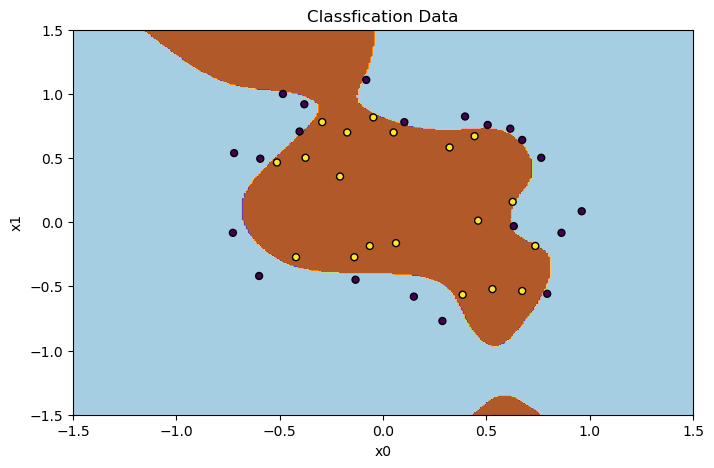

In [75]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z12, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:,0], X1_train_sam[:,1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

<div class='alert-block alert-info'> 

Please be aware that to achieve overfitting result, the types of solvers matters. For the example above, `lbfgs` return better performance than `sag` or `saga`.  Other solver were unable to converge.

How the data is scaled also affect the performance. If we use `MinMaxScaler()` with solver `lbfgs`, the solver could not converge. However, under  `lbfgs`, the solver could achieve best performance using `StandardScaler()`. 

**The rule of thumb is look at the data we have. If it is a Gaussian distribution use `StandardScaler()`.**

</div>

### Just Right Fitting

In [76]:
degree = 3
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe13 = Pipeline(stepsLogisticsRegression)

losPipe13.fit(X1_train_sam, np.ravel(y1_train_sam))

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [77]:
losPipe13.score(X1_train_sam, np.ravel(y1_train_sam))

0.9

In [78]:
x_min, x_max = X1_train_sam[:,0].min() - 1, X1_train_sam[:,0].max() + 1
y_min, y_max = X1_train_sam[:,1].min() - 1, X1_train_sam[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z13 = losPipe13.predict(np.c_[xx.ravel(), yy.ravel()])
Z13 = Z13.reshape(xx.shape)

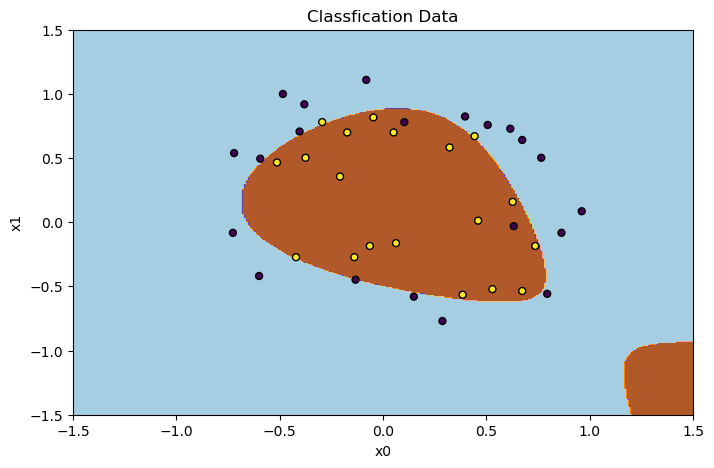

In [79]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z13, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:,0], X1_train_sam[:,1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Addressing Overfitting

In SciKit Learn, Logistic Regression, it has a default of L2 regularization penalty. The control parameters of regularization is `C` where low `C` is high regularization and high `C` is low regularization.   

In [80]:
degree = 20
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=0.8, solver='lbfgs', max_iter=10000))
]

losPipe14 = Pipeline(stepsLogisticsRegression)

losPipe14.fit(X1_train_sam, np.ravel(y1_train_sam))

Pipeline(steps=[('poly', PolynomialFeatures(degree=20, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.8, max_iter=10000))])

In [81]:
losPipe14.score(X1_train_sam, np.ravel(y1_train_sam))

0.9

In [82]:
x_min, x_max = X1_train_sam[:,0].min() - 1, X1_train_sam[:,0].max() + 1
y_min, y_max = X1_train_sam[:,1].min() - 1, X1_train_sam[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z14 = losPipe14.predict(np.c_[xx.ravel(), yy.ravel()])
Z14 = Z14.reshape(xx.shape)

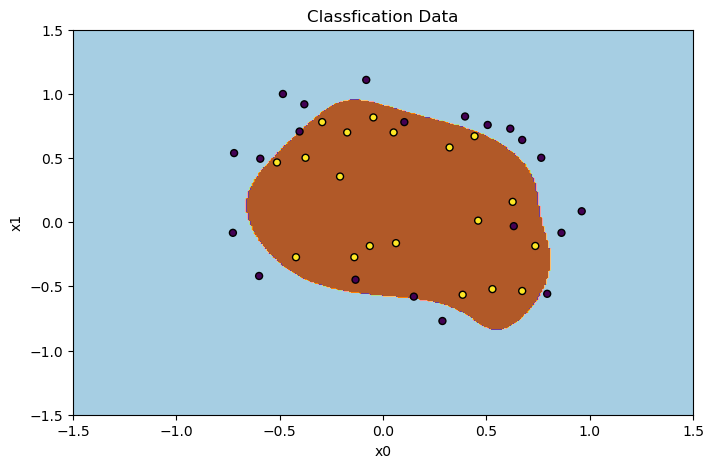

In [83]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z14, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:,0], X1_train_sam[:,1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

Accuracy drop to 90% which is similar to our result when using degree 3.

### Application of Logistic Gradient Descent on Example 1

In [84]:
X1_train_sam.shape

(40, 2)

In [85]:
y1_train_sam.shape

(40, 1)

#### Underfitting

In [86]:
y1_train_oh_sam = np.eye(2)[y1_train_sam.flatten()]
y1_train_oh_sam.shape

(40, 2)

In [87]:
degree = 1
polynomial_features11 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly11 = polynomial_features11.fit_transform(X1_train_sam)

std_scaler11 = StandardScaler()
X1_norm11 = std_scaler11.fit_transform(X1_poly11)

In [88]:
m,n = X1_norm11.shape
k = len(np.unique(y1_train))

In [89]:
lambdaRegu = 0.                                          
iterations = 10000
alpha = 0.01

In [90]:
coef11, intercept11, _, _, _ = my.categorical_softmax_gradient_descent(X1_norm11, y1_train_oh_sam, 2, iterations=iterations, alpha=alpha, 
                                                                    reguLambda=lambdaRegu)

iteration 9999: cost = 6.833241e-01: intercept = [[ 0.05071982 -0.05071982]]: weights = [[ 0.0482094   0.13435788]
 [-0.0482094  -0.13435788]]
best w [[ 0.048209 -0.048209]
 [ 0.134358 -0.134358]]
best b [[ 0.05072 -0.05072]]


In [91]:
#Compute accuracy on our training set
y_hat11, proba = my.softmax_predict(X1_norm11, coef11, intercept11)
print('Train Accuracy: %f'%(np.mean(y_hat11.reshape(-1,1) == y1_train_sam.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_hat11.reshape(-1,1) == losPipe11.predict(X1_train_sam).reshape(-1,1)) * 100))

Train Accuracy: 55.000000
Compare Prediction with SciKit Learn: 100.000000


In [92]:
x_min, x_max = X1_train_sam[:, 0].min() - 1, X1_train_sam[:, 0].max() + 1
y_min, y_max = X1_train_sam[:, 1].min() - 1, X1_train_sam[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features11.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler11.transform(XX_poly)
ZG15, _ = my.softmax_predict(XX_norm, coef11, intercept11)
ZG15 = ZG15.reshape(xx.shape)

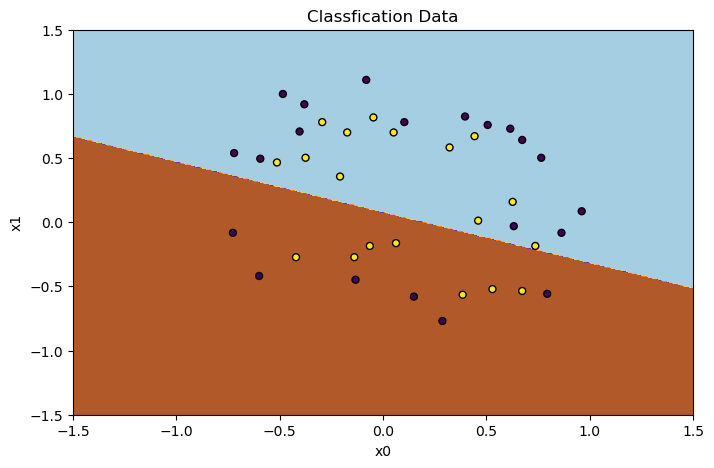

In [93]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG15, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:, 0], X1_train_sam[:, 1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Overfitting

In [94]:
degree = 20
polynomial_features12 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly12 = polynomial_features12.fit_transform(X1_train_sam)

std_scaler12 = StandardScaler()
X1_norm12 = std_scaler12.fit_transform(X1_poly12)

In [95]:
m,n = X1_norm12.shape

In [96]:
n

230

In [97]:
k

2

In [98]:
random.seed(149)
initial_w = np.random.rand(n,k)-1.5
initial_b = np.ones((1,k))
lambdaRegu = 0.
alpha=0.01
iterations = 30000

In [99]:
coef12, intercept12, _, _, _ = my.categorical_softmax_gradient_descent(X1_norm12, y1_train_oh_sam, 2, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 29999: cost = 7.191571e-02: intercept = [[ 2.03292443 -0.03292443]]: weights = [[-0.33938103 -2.9156886  -0.58976575 -0.47364511  0.61362607 -1.56645062
  -0.7890348  -2.35021935 -1.94213093  0.01777989 -1.56822344 -1.96617521
  -0.09177259  0.3076116  -1.34710104 -0.45847905 -2.58797605 -0.54758457
  -0.94526055 -0.69184408 -0.17079813 -0.6039288  -1.95634372 -0.97172646
  -0.97837256 -0.55500316 -0.00635032 -0.84658427 -0.69886096 -2.21231894
  -0.01161832 -2.32614886 -1.03091406  0.16666948 -1.1597075  -0.6637495
  -0.45856757 -1.09971719 -0.76944985 -0.72158625 -1.37236595 -0.31551731
  -0.91448662 -0.54700699 -1.34027564 -0.80697867 -2.00487759 -0.41093814
  -1.3014647  -0.13396554 -1.6259881  -0.35845797 -0.07753705 -0.58921755
  -1.16277986 -0.47378807 -0.77935519 -1.06924426 -1.22378149 -1.43115686
  -0.85336889 -1.70328936 -0.87334419 -0.20318377 -1.23664667 -0.72504047
  -0.91067099 -1.75548463 -1.39667694 -0.89056522 -0.72193793 -1.72758636
  -0.66302684 -0.7734528

In [100]:
#Compute accuracy on our training set
y_hat12, proba = my.softmax_predict(X1_norm12, coef12, intercept12)
print('Train Accuracy: %f'%(np.mean(y_hat12.reshape(-1,1) == y1_train_sam.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_hat12.reshape(-1,1) == losPipe12.predict(X1_train_sam).reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


In [101]:
x_min, x_max = X1_train_sam[:, 0].min() - 1, X1_train_sam[:, 0].max() + 1
y_min, y_max = X1_train_sam[:, 1].min() - 1, X1_train_sam[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features12.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler12.transform(XX_poly)
ZG16, _ = my.softmax_predict(XX_norm, coef12, intercept12)
ZG16 = ZG16.reshape(xx.shape)

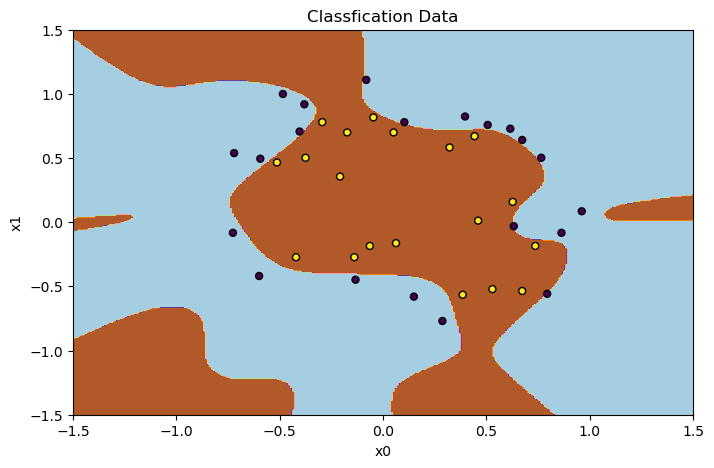

In [102]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG16, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:, 0], X1_train_sam[:, 1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

In [103]:
coef12_sp, intercept12_sp, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X1_norm12, y1_train_sam, 2, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 29999: cost = 7.191571e-02: intercept = [[ 2.03292443 -0.03292443]]: weights = [[-0.33938103 -2.9156886  -0.58976575 -0.47364511  0.61362607 -1.56645062
  -0.7890348  -2.35021935 -1.94213093  0.01777989 -1.56822344 -1.96617521
  -0.09177259  0.3076116  -1.34710104 -0.45847905 -2.58797605 -0.54758457
  -0.94526055 -0.69184408 -0.17079813 -0.6039288  -1.95634372 -0.97172646
  -0.97837256 -0.55500316 -0.00635032 -0.84658427 -0.69886096 -2.21231894
  -0.01161832 -2.32614886 -1.03091406  0.16666948 -1.1597075  -0.6637495
  -0.45856757 -1.09971719 -0.76944985 -0.72158625 -1.37236595 -0.31551731
  -0.91448662 -0.54700699 -1.34027564 -0.80697867 -2.00487759 -0.41093814
  -1.3014647  -0.13396554 -1.6259881  -0.35845797 -0.07753705 -0.58921755
  -1.16277986 -0.47378807 -0.77935519 -1.06924426 -1.22378149 -1.43115686
  -0.85336889 -1.70328936 -0.87334419 -0.20318377 -1.23664667 -0.72504047
  -0.91067099 -1.75548463 -1.39667694 -0.89056522 -0.72193793 -1.72758636
  -0.66302684 -0.7734528

In [104]:
#Compute accuracy on our training set
y_hat12_sp, proba = my.softmax_predict(X1_norm12, coef12_sp, intercept12_sp)
print('Train Accuracy: %f'%(np.mean(y_hat12_sp.reshape(-1,1) == y1_train_sam.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_hat12_sp.reshape(-1,1) == losPipe12.predict(X1_train_sam).reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


#### Addressing Overfitting with Regularization

In [105]:
degree = 20
polynomial_features13 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly13 = polynomial_features13.fit_transform(X1_train_sam)

std_scaler13 = StandardScaler()
X1_norm13 = std_scaler13.fit_transform(X1_poly13)

In [106]:
random.seed(149)
initial_w = np.random.rand(n,k)-1.5
initial_b = np.ones((1,k))
lambdaRegu = 3  
alpha = 0.01
iterations = 10000

In [107]:
coef13, intercept13, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X1_norm13, y1_train_sam, 2, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 3.252659e-01: intercept = [[1.62628462 0.37371538]]: weights = [[-7.06229256e-02 -3.40430440e-01  1.55884987e-01  9.00916964e-02
   2.74355680e-01 -1.35478269e-01  2.74516216e-02 -6.22382516e-02
  -1.44169447e-01  2.08840342e-01  6.38313259e-02 -4.36246271e-02
   3.89628455e-02  2.13367140e-01 -6.72755057e-02  5.31027278e-02
  -2.29792243e-01  7.12214722e-02  7.17348392e-02 -2.21840511e-02
   1.64495999e-01  7.07029001e-02 -7.57235068e-03 -9.61067848e-03
   8.33942874e-02  2.95877286e-02  1.31192597e-01 -1.62518722e-02
   2.85119400e-02 -1.56414927e-01  1.00455090e-01 -1.12402779e-01
   6.03101763e-02  1.05487543e-01  1.37106255e-02  1.18090791e-01
   5.25450562e-02  1.70297718e-02  1.62281887e-02  5.90228619e-02
  -2.77138427e-02  9.24194719e-02  3.12797360e-02  7.89608668e-02
   1.20063830e-02  5.04397773e-03 -8.82779946e-02  6.73579134e-02
  -9.23733284e-02  8.95167344e-02 -2.90400259e-02  4.39707843e-02
   8.82141470e-02  2.05019572e-02  8.65376468e-02  2.670

In [108]:
#Compute accuracy on our training set
y_hat13, _ = my.softmax_predict(X1_norm13, coef13, intercept13)
print('Train Accuracy: %f'%(np.mean(y_hat13.reshape(-1,1) == y1_train_sam.reshape(-1,1)) * 100))

Train Accuracy: 90.000000


In [109]:
x_min, x_max = X1_train_sam[:, 0].min() - 1, X1_train_sam[:, 0].max() + 1
y_min, y_max = X1_train_sam[:, 1].min() - 1, X1_train_sam[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features13.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler13.transform(XX_poly)
ZG17, _ = my.softmax_predict(XX_norm, coef13, intercept13)
ZG17 = ZG17.reshape(xx.shape)

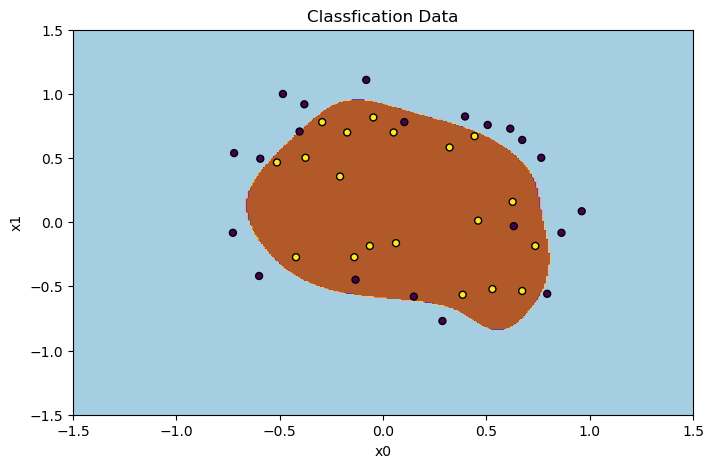

In [110]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG17, cmap=plt.cm.Paired)
plt.scatter(X1_train_sam[:, 0], X1_train_sam[:, 1], marker="o", c=y1_train_sam, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Application of Softmax Regression with Regularization with Example 2

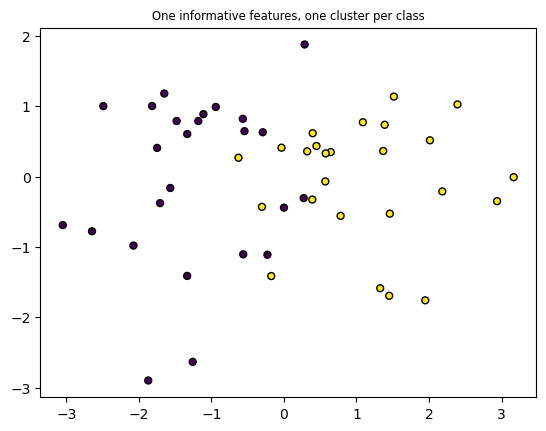

In [111]:
plt.title("One informative features, one cluster per class", fontsize="small")
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=y2, s=25, edgecolor="k")
plt.show()

### Overfitting

In [112]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe21 = Pipeline(stepsLogisticsRegression)

losPipe21.fit(X2, y2)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [113]:
losPipe21.score(X2, y2)

1.0

In [114]:
x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z21 = losPipe21.predict(np.c_[xx.ravel(), yy.ravel()])
Z21 = Z21.reshape(xx.shape)

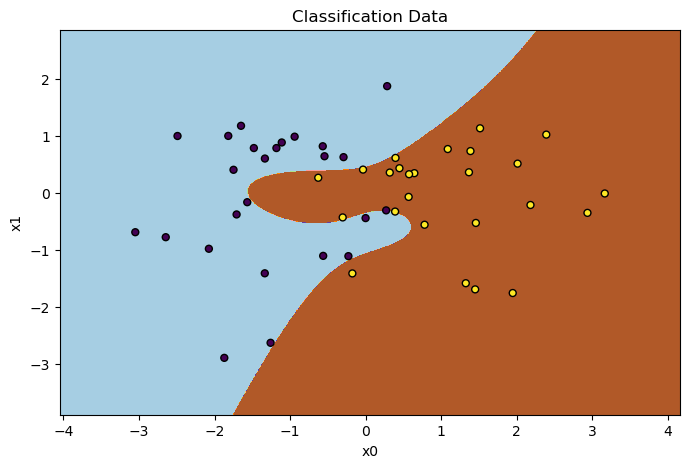

In [115]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z21, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k')
ax1.set_title('Classification Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Addressing Overfitting Problem

In [116]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=10000))
]

losPipe22 = Pipeline(stepsLogisticsRegression)

losPipe22.fit(X2, y2)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.01, max_iter=10000))])

In [117]:
losPipe22.score(X2, y2)

0.88

In [118]:
x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z22 = losPipe22.predict(np.c_[xx.ravel(), yy.ravel()])
Z22 = Z22.reshape(xx.shape)

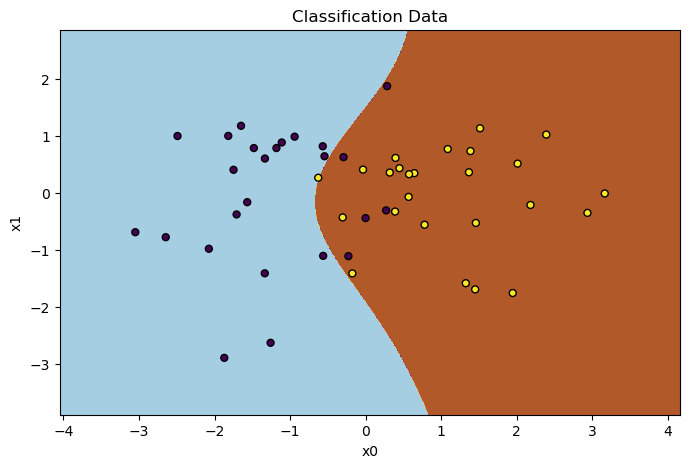

In [119]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z22, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k')
ax1.set_title('Classification Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of Logistic Gradient Descent on Example 2

#### Overfitting

In [120]:
degree = 5
polynomial_features21 = PolynomialFeatures(degree=degree, include_bias=False)
X2_poly21 = polynomial_features21.fit_transform(X2)

std_scaler21 = StandardScaler()
X2_norm21 = std_scaler21.fit_transform(X2_poly21)

In [121]:
y2_oh = np.eye(2)[y2.flatten()]
y2_oh.shape

(50, 2)

In [122]:
m,n = X2_norm21.shape
k = len(np.unique(y2))
k

2

In [123]:
random.seed(147)
initial_w = np.random.rand(n,k)-0.5
#initial_w = np.ones(n,k)
initial_b = np.ones((1,k))
lambdaRegu = 0  
alpha = 0.1
iterations = 800000

In [124]:
# Please wait for few minutes for the following line. It is a 800k iteration process!!!
# We are trying to get a overfitting result, thus need very high iterations
# Estimate time is ~2 minutes

startTime = datetime.now()
print(startTime)
coef21, intercept21, _, _, _ = my.categorical_softmax_gradient_descent(X2_norm21, y2_oh, k, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)
endTime = datetime.now()
print(endTime)
print('duration:', endTime - startTime )

2024-11-02 11:01:36.733177
iteration 799999: cost = 3.933776e-02: intercept = [[1.07598578 0.92401422]]: weights = [[  0.77411554  -3.46245249 -13.21346095 -10.52923373   9.98967352
  -29.26974839   5.13710062 -21.52914078  25.09256937  12.79304961
   11.87619239   3.81284344   4.61774326  -7.38364904  -7.93562393
   -3.40318142  -5.93349243  -3.93189908  -6.23205584   5.21398169]
 [ -1.71069921   3.67417417  12.61472723  10.54182857 -10.59775751
   29.37869416  -5.09294299  21.93414201 -25.08762188 -13.04518943
  -11.95169648  -3.94485221  -5.47012527   7.80753599   8.46836646
    3.08279007   6.28218      3.45124187   5.67110189  -5.53245094]]
best w [[  0.774116  -1.710699]
 [ -3.462452   3.674174]
 [-13.213461  12.614727]
 [-10.529234  10.541829]
 [  9.989674 -10.597758]
 [-29.269748  29.378694]
 [  5.137101  -5.092943]
 [-21.529141  21.934142]
 [ 25.092569 -25.087622]
 [ 12.79305  -13.045189]
 [ 11.876192 -11.951696]
 [  3.812843  -3.944852]
 [  4.617743  -5.470125]
 [ -7.383649  

In [125]:
#Compute accuracy on our training set
y_hat21, _ = my.softmax_predict(X2_norm21, coef21, intercept21)
print('Train Accuracy: %f'%(np.mean(y_hat21.reshape(-1,1) == y2.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [126]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features21.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler21.transform(XX_poly)
ZG23, _ = my.softmax_predict(XX_norm, coef21, intercept21)
ZG23 = ZG23.reshape(xx.shape)

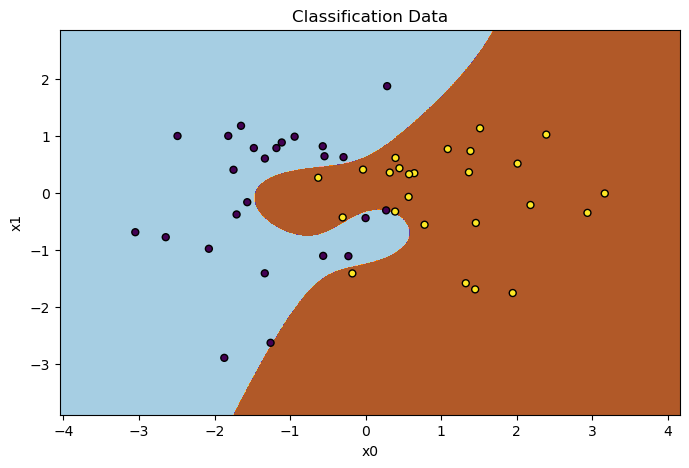

In [127]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG23, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k')
ax1.set_title('Classification Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Addressing Overfitting

In [128]:
degree = 5
polynomial_features22 = PolynomialFeatures(degree=degree, include_bias=False)
X2_poly22 = polynomial_features22.fit_transform(X2)

std_scaler22 = StandardScaler()
X2_norm22 = std_scaler22.fit_transform(X2_poly22)

In [129]:
X2_norm22.shape

(50, 20)

In [130]:
lambdaRegu = 40  
alpha = 1
iterations = 10000

In [131]:
coef22, intercept22, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X2_norm22, y2, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 9999: cost = 4.875405e-01: intercept = [[ 0.04041215 -0.04041215]]: weights = [[-0.23342272  0.05382261  0.00565382 -0.02390774  0.03685595 -0.11127121
   0.02497587 -0.0904242   0.03273992 -0.00724113 -0.00596786  0.00164002
   0.01742959  0.01218296 -0.0602826   0.00727492 -0.07216243  0.0110886
  -0.02256109  0.00944397]
 [ 0.23342272 -0.05382261 -0.00565382  0.02390774 -0.03685595  0.11127121
  -0.02497587  0.0904242  -0.03273992  0.00724113  0.00596786 -0.00164002
  -0.01742959 -0.01218296  0.0602826  -0.00727492  0.07216243 -0.0110886
   0.02256109 -0.00944397]]
best w [[-0.233423  0.233423]
 [ 0.053823 -0.053823]
 [ 0.005654 -0.005654]
 [-0.023908  0.023908]
 [ 0.036856 -0.036856]
 [-0.111271  0.111271]
 [ 0.024976 -0.024976]
 [-0.090424  0.090424]
 [ 0.03274  -0.03274 ]
 [-0.007241  0.007241]
 [-0.005968  0.005968]
 [ 0.00164  -0.00164 ]
 [ 0.01743  -0.01743 ]
 [ 0.012183 -0.012183]
 [-0.060283  0.060283]
 [ 0.007275 -0.007275]
 [-0.072162  0.072162]
 [ 0.011089 -0.01

In [132]:
#Compute accuracy on our training set
y_hat22, _ = my.softmax_predict(X2_norm22, coef22, intercept22)
print('Train Accuracy: %f'%(np.mean(y_hat22.reshape(-1,1) == y2.reshape(-1,1)) * 100))

Train Accuracy: 88.000000


In [133]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features22.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler22.transform(XX_poly)
ZG24, _ = my.softmax_predict(XX_norm, coef22, intercept22)
ZG24 = ZG24.reshape(xx.shape)

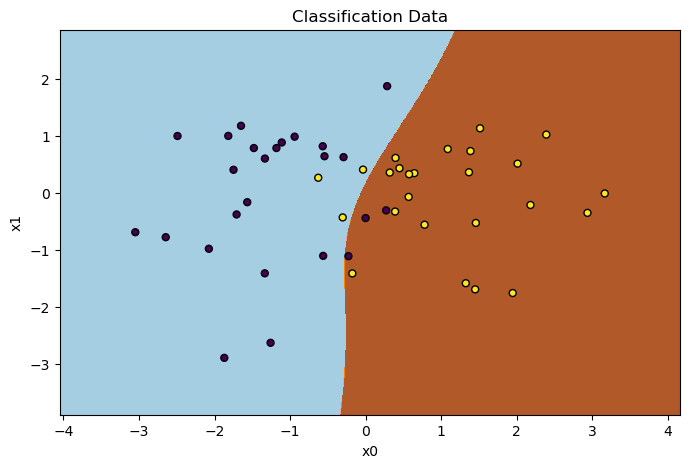

In [134]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG24, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k')
ax1.set_title('Classification Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Application of Softmax Regression with Regularization with Example 3:

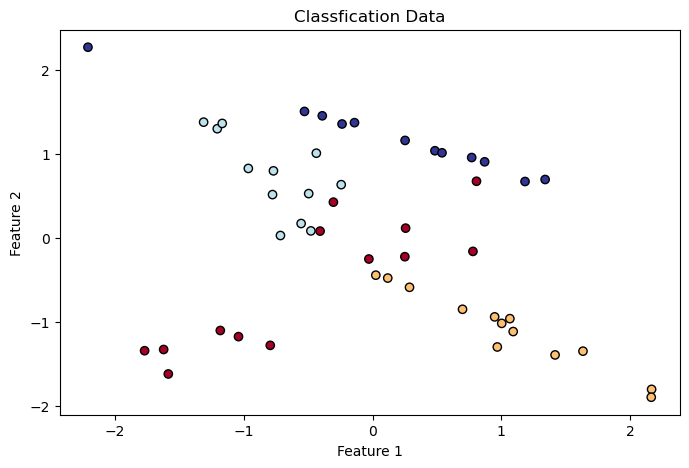

In [135]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

In [136]:
X3.shape

(50, 2)

In [137]:
y3.shape

(50,)

### Underfitting

In [138]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe31 = Pipeline(stepsLogisticsRegression)

losPipe31.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [139]:
losPipe31.score(X3, np.ravel(y3))

0.9

In [140]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z31 = losPipe31.predict(np.c_[xx.ravel(), yy.ravel()])
Z31 = Z31.reshape(xx.shape)

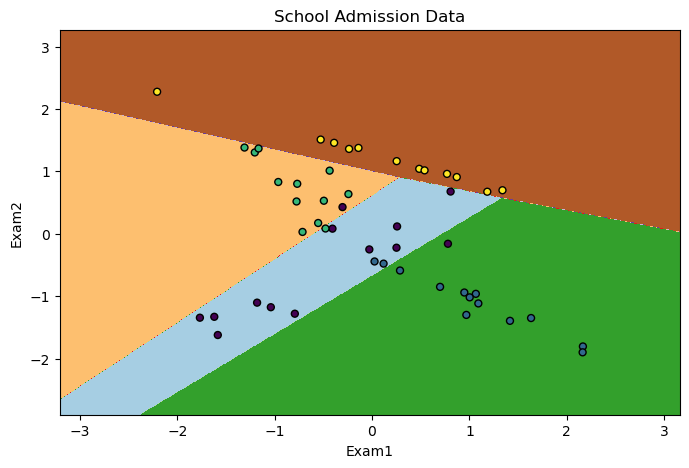

In [141]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z31, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Overfitting

In [142]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe32 = Pipeline(stepsLogisticsRegression)

losPipe32.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [143]:
losPipe32.score(X3, y3)

1.0

In [144]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z32 = losPipe32.predict(np.c_[xx.ravel(), yy.ravel()])
Z32 = Z32.reshape(xx.shape)

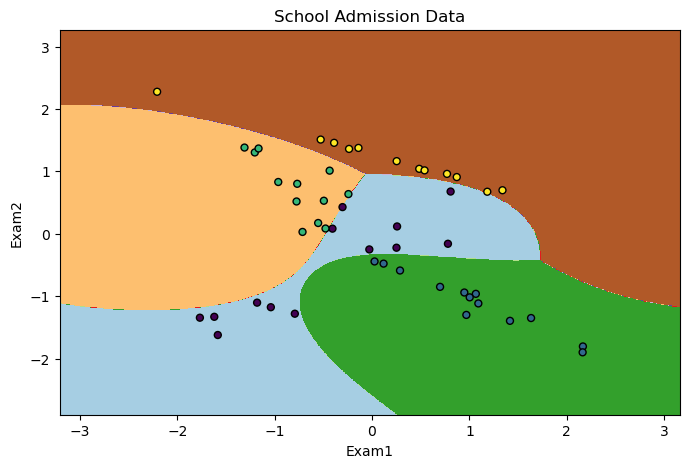

In [145]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z32, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Addressing Overfitting

In [146]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(C=1, solver='lbfgs', max_iter=10000))
]

losPipe33 = Pipeline(stepsLogisticsRegression)

losPipe33.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=1, max_iter=10000))])

In [147]:
losPipe33.score(X3, y3)

0.86

In [148]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z33 = losPipe33.predict(np.c_[xx.ravel(), yy.ravel()])
Z33 = Z33.reshape(xx.shape)

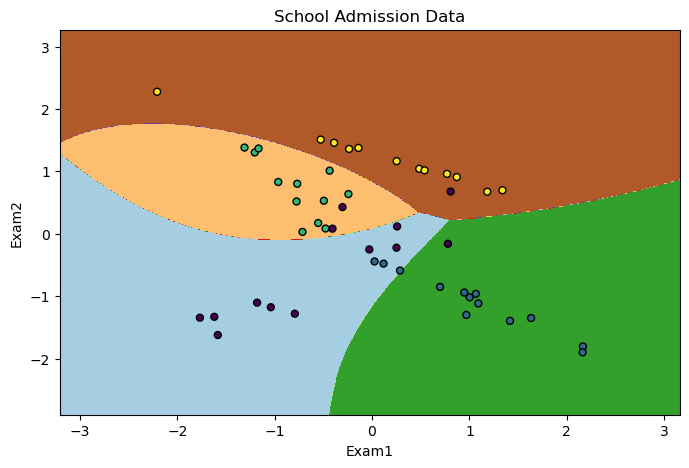

In [149]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z33, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Application of Softmax Gradient Descent on Example 3

### Underfitting

In [150]:
degree = 1
polynomial_features31 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly31 = polynomial_features31.fit_transform(X3)

std_scaler31 = StandardScaler()
X3_norm31 = std_scaler31.fit_transform(X3_poly31)

In [151]:
k = len(np.unique(y3))
k

4

In [152]:
lambdaRegu = 0 
alpha = 0.1
iterations = 50000

In [153]:
coef31, intercept31, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X3_norm31, y3, k, iterations=iterations, 
                                                      alpha=alpha, reguLambda=lambdaRegu)

iteration 49999: cost = 2.026468e-01: intercept = [[  6.3524899    2.53765189   3.425205   -12.31534679]]: weights = [[ -0.91375435  -6.59075991]
 [  3.89596125 -12.19971404]
 [ -6.22754708   0.11411194]
 [  3.24534018  18.67636201]]
best w [[ -0.913754   3.895961  -6.227547   3.24534 ]
 [ -6.59076  -12.199714   0.114112  18.676362]]
best b [[  6.35249    2.537652   3.425205 -12.315347]]


In [154]:
#Compute accuracy on our training set
y_hat31, _ = my.softmax_predict(X3_norm31, coef31, intercept31)
print('Train Accuracy: %f'%(np.mean(y_hat31.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 90.000000


In [155]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features31.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler31.transform(XX_poly)
ZG25, _ = my.softmax_predict(XX_norm, coef31, intercept31)
ZG25 = ZG25.reshape(xx.shape)

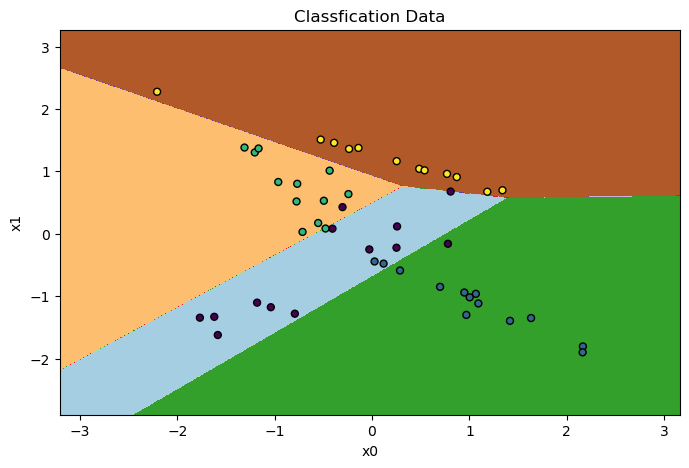

In [156]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG25, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [157]:
degree = 5
polynomial_features32 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly32 = polynomial_features32.fit_transform(X3)

std_scaler32 = StandardScaler()
X3_norm32 = std_scaler32.fit_transform(X3_poly32)

In [158]:
m,n = X3_norm32.shape

In [159]:
lambdaRegu = 0  
alpha = 0.1
iterations = 100000

In [160]:
coef32, intercept32, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X3_norm32, y3, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 99999: cost = 3.798773e-02: intercept = [[-1.7437744  -0.68930392  1.08095973  1.35211859]]: weights = [[  5.60175965   2.61712622  -2.6817976    6.77010625  -8.52615401
   -2.18336658  -6.03063592  -6.46176763  -8.949142    -0.66439481
    0.43457013   2.19649349   2.92969092   2.20866528  -1.70324146
   -1.93401384  -1.61366992  -1.86765922  -2.32350988  -3.5434851 ]
 [  3.30226102 -13.80838753  -6.82786991  -6.56537805   3.0597131
    0.59536211   1.41466275   4.22928148   1.67351459  -0.59870477
   -1.22218715  -1.00660637  -2.89819066  -2.69680863   0.20288609
    0.09602538   0.65802652   0.618534     1.54025975   1.77833864]
 [-12.86825111   5.54333694   5.85199374  -3.38150179  -0.88187164
   -1.81094721   2.18393719   0.97605232   2.50586473  -0.59988791
   -0.87715625  -1.62533084  -0.75421233  -2.4716257    0.2254758
    0.60855091   0.58100852   0.46332654   0.80363692  -0.58590154]
 [  3.96423044   5.64792436   3.65767377   3.17677359   6.34831256
    3.39895168 

In [161]:
#Compute accuracy on our training set
y_hat32, _ = my.softmax_predict(X3_norm32, coef32, intercept32)
print('Train Accuracy: %f'%(np.mean(y_hat32.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [162]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features32.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler32.transform(XX_poly)
ZG26, _ = my.softmax_predict(XX_norm, coef32, intercept32)
ZG26 = ZG26.reshape(xx.shape)

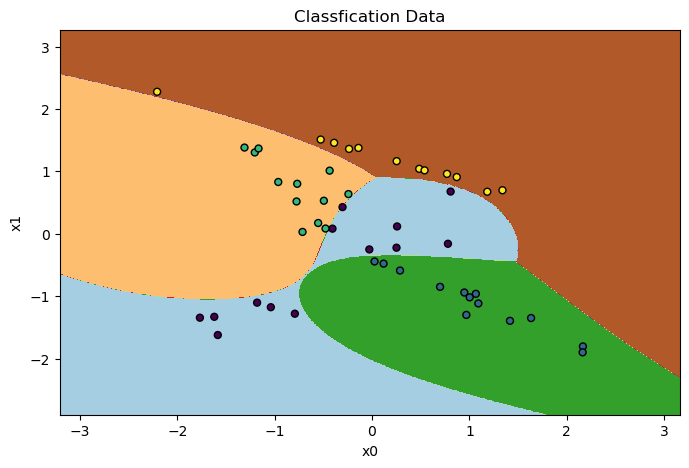

In [163]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG26, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Address Overfitting

In [164]:
degree = 5
polynomial_features33 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly33 = polynomial_features33.fit_transform(X3)

std_scaler33 = StandardScaler()
X3_norm33 = std_scaler33.fit_transform(X3_poly33)

In [165]:
lambdaRegu = 10  
alpha = 0.01
iterations = 50000

In [166]:
coef33, intercept33, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X3_norm33, y3, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 49999: cost = 7.121747e-01: intercept = [[ 0.01618335  0.01912496  0.0063137  -0.04162202]]: weights = [[-1.42368801e-01 -2.54485286e-01 -1.13152502e-02  2.94036451e-01
  -1.49330734e-01 -1.21827561e-01 -1.10898154e-01 -1.43594914e-01
  -1.73292354e-01  1.89098060e-02  1.08084277e-01  1.58133476e-02
   1.31736965e-01 -3.02236999e-02 -6.36792886e-02 -4.82089265e-02
  -5.71195732e-02 -4.61276414e-02 -5.48830553e-02 -7.80471292e-02]
 [ 3.25564033e-01 -4.77332140e-01  4.63781744e-04 -2.73805680e-01
   3.30801383e-02  1.16065308e-01 -1.20888366e-01  1.69012372e-01
  -1.71014329e-01  1.00254217e-03 -9.30132979e-02  1.75322521e-02
  -9.79211445e-02 -9.85802629e-03  4.30499271e-02 -3.07515746e-02
   5.39510178e-02 -3.24373143e-02  6.49213155e-02 -5.27468870e-02]
 [-4.86598454e-01  2.71512929e-01  2.72118449e-02 -2.48549247e-01
  -1.78168046e-01 -9.48156137e-02  1.27214563e-01 -8.53332783e-02
   4.30758430e-02 -4.35681439e-02 -5.33273110e-02 -3.80971886e-02
  -4.81338393e-02 -1.276005

In [167]:
#Compute accuracy on our training set
y_hat33, _ = my.softmax_predict(X3_norm33, coef33, intercept33)
print('Train Accuracy: %f'%(np.mean(y_hat33.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 86.000000


In [168]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features33.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler33.transform(XX_poly)
ZG27, _ = my.softmax_predict(XX_norm, coef33, intercept33)
ZG27 = ZG27.reshape(xx.shape)

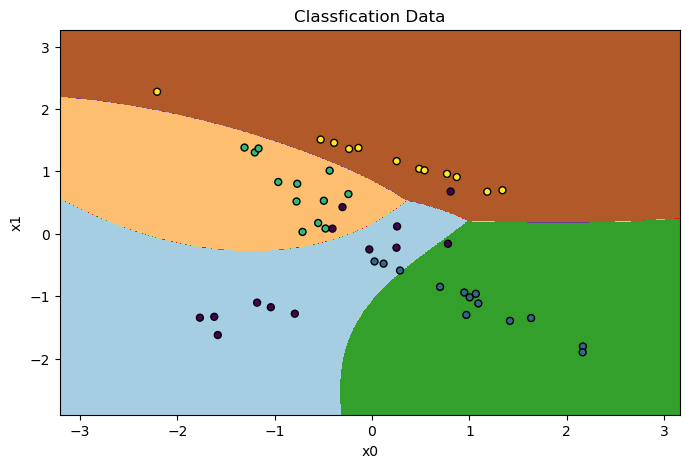

In [169]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG27, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR on Example 3

### OvR Underfit

In [170]:
degree = 1
polynomial_features301 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly301 = polynomial_features301.fit_transform(X3)
std_scaler301 = StandardScaler()
X3_norm301 = std_scaler301.fit_transform(X3_poly301)

In [171]:
GD_result301 = my.ovrLogisticRegression(X3_norm301, y3, alpha = 0.1, iterations=10000, reguLambda=0)
y_predict301, _ = my.ovrMultiClassPredict(X3_norm301, GD_result301)

Classifying Class: 0
iteration 9999: cost = 4.2483e-01: intercept = -1.3177e+00: weights = [-1.23373228 -1.32970253]
best w [-1.2337 -1.3297]
best b -1.3177
Classifying Class: 1
iteration 9999: cost = 1.1077e-01: intercept = -4.0511e+00: weights = [ 4.50408342 -5.78975619]
best w [ 4.5041 -5.7898]
best b -4.0511
Classifying Class: 2
iteration 9999: cost = 4.0098e-01: intercept = -1.8138e+00: weights = [-1.4094426   0.96029569]
best w [-1.4094  0.9603]
best b -1.8138
Classifying Class: 3
iteration 9999: cost = 5.3544e-02: intercept = -8.2657e+00: weights = [4.12349165 9.17046928]
best w [4.1235 9.1705]
best b -8.2657


In [172]:
print('Train Accuracy: %f'%(np.mean(y_predict301.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 84.000000


In [173]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features301.transform(zz)
zz_norm = std_scaler301.transform(zz_poly)
ZG301, _ = my.ovrMultiClassPredict(zz_norm, GD_result301)
ZG301 = ZG301.reshape(xx.shape)

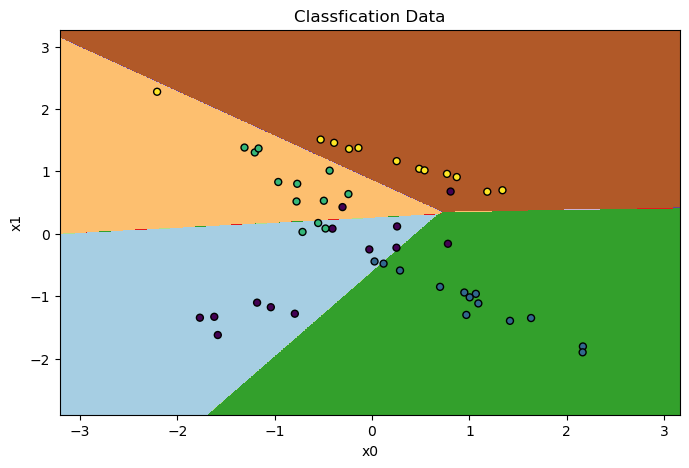

In [174]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG301, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### OvR Overfit

In [175]:
degree = 5
polynomial_features302 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly302 = polynomial_features302.fit_transform(X3)
std_scaler302 = StandardScaler()
X3_norm302 = std_scaler302.fit_transform(X3_poly302)

In [176]:
start_time = datetime.now()
print(start_time)

GD_result302 = my.ovrLogisticRegression(X3_norm302, y3, alpha = 0.1, iterations=100000, reguLambda=0)
y_predict302, _ = my.ovrMultiClassPredict(X3_norm302, GD_result302)

end_time = datetime.now()
print('Duration:', end_time - start_time)

2024-11-02 11:04:06.007178
Classifying Class: 0
iteration 99999: cost = 5.7482e-02: intercept = -1.1291e+01: weights = [  7.70316973   7.78675685  -6.55842177  11.01792989 -14.37842425
  -4.50786674 -13.34693534 -14.33797266 -14.11822698  -1.0376896
  -2.33993209   4.80692187   2.41940542   6.44115681  -3.5174953
  -4.72539377  -3.35559421  -3.83062935  -5.32195047  -5.9971022 ]
best w [  7.7032   7.7868  -6.5584  11.0179 -14.3784  -4.5079 -13.3469 -14.338
 -14.1182  -1.0377  -2.3399   4.8069   2.4194   6.4412  -3.5175  -4.7254
  -3.3556  -3.8306  -5.322   -5.9971]
best b -11.2911
Classifying Class: 1
iteration 99999: cost = 1.0779e-02: intercept = -5.6512e+00: weights = [  1.60412149 -15.7545402   -8.53233976 -10.13057792   4.99945817
   0.95312737   1.64110295   6.35217395   3.12766723   0.50473889
  -2.63140581  -0.12413189  -5.18937811  -2.70562098   0.64098455
  -0.4815408    1.21879603   0.52750484   2.38742676   2.66305702]
best w [  1.6041 -15.7545  -8.5323 -10.1306   4.9995   

In [177]:
print('Train Accuracy: %f'%(np.mean(y_predict302.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [178]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features302.transform(zz)
zz_norm = std_scaler302.transform(zz_poly)
ZG302, _ = my.ovrMultiClassPredict(zz_norm, GD_result302)
ZG302 = ZG302.reshape(xx.shape)

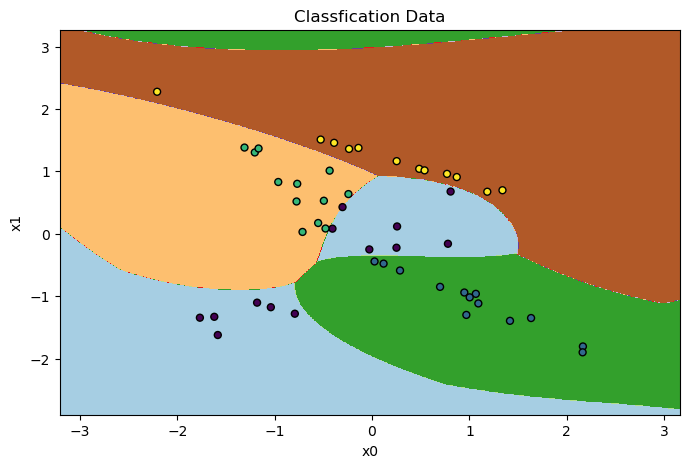

In [179]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG302, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### OvR Address Overfitting

In [180]:
degree = 5
polynomial_features303 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly303 = polynomial_features303.fit_transform(X3)
std_scaler303 = StandardScaler()
X3_norm303 = std_scaler303.fit_transform(X3_poly303)

In [181]:
start_time = datetime.now()
print(start_time)

GD_result303 = my.ovrLogisticRegression(X3_norm303, y3, alpha = 0.1, iterations=10000, reguLambda=20)
y_predict303, _ = my.ovrMultiClassPredict(X3_norm303, GD_result303)

end_time = datetime.now()
print('Duration:', end_time - start_time)

2024-11-02 11:04:51.923846
Classifying Class: 0
iteration 9999: cost = 4.7099e-01: intercept = -1.1742e+00: weights = [-0.14380245 -0.20120014 -0.00298046  0.25500592 -0.10704197 -0.12186019
 -0.08705976 -0.12317453 -0.1373808   0.00821829  0.12144105  0.00217056
  0.13434818 -0.03593462 -0.07229552 -0.03640561 -0.06127172 -0.03778546
 -0.05180293 -0.06486474]
best w [-0.1438 -0.2012 -0.003   0.255  -0.107  -0.1219 -0.0871 -0.1232 -0.1374
  0.0082  0.1214  0.0022  0.1343 -0.0359 -0.0723 -0.0364 -0.0613 -0.0378
 -0.0518 -0.0649]
best b -1.1742
Classifying Class: 1
iteration 9999: cost = 4.0102e-01: intercept = -1.1539e+00: weights = [ 0.27961304 -0.3407349   0.01819627 -0.21696012  0.01535414  0.12777733
 -0.09911898  0.16106239 -0.1425537   0.00753597 -0.09032519  0.01624034
 -0.08753282 -0.00994536  0.06080722 -0.03140145  0.06542681 -0.03362891
  0.07095189 -0.05202014]
best w [ 0.2796 -0.3407  0.0182 -0.217   0.0154  0.1278 -0.0991  0.1611 -0.1426
  0.0075 -0.0903  0.0162 -0.0875 -0

In [182]:
print('Train Accuracy: %f'%(np.mean(y_predict303.reshape(-1,1) == y3.reshape(-1,1)) * 100))

Train Accuracy: 86.000000


In [183]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features303.transform(zz)
zz_norm = std_scaler303.transform(zz_poly)
ZG303, _ = my.ovrMultiClassPredict(zz_norm, GD_result303)
ZG303 = ZG303.reshape(xx.shape)

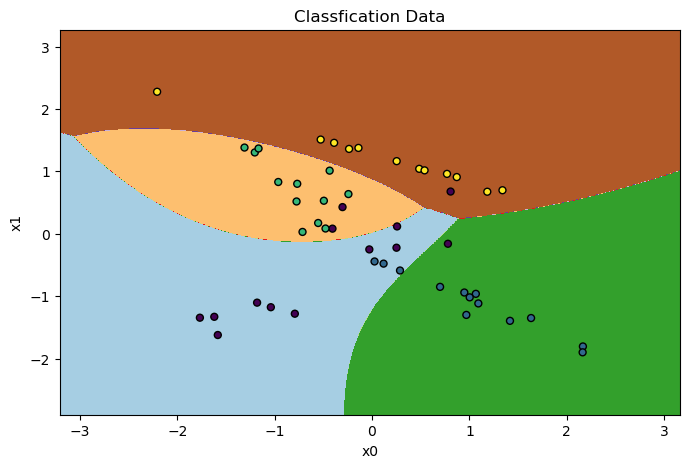

In [184]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG303, cmap=plt.cm.Paired)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=y3, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Application of Softmax Regression with regularization on Example 4

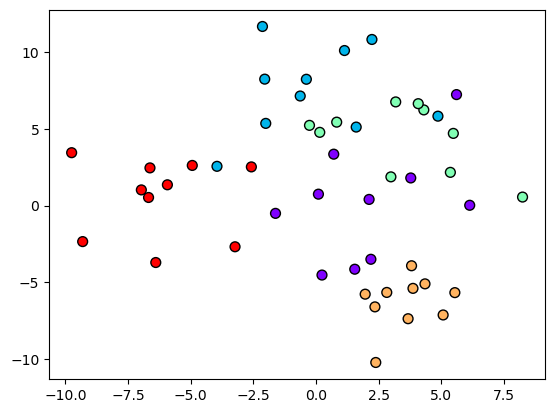

In [185]:
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='rainbow', edgecolors='k', s=50)
plt.show()

In [186]:
X4.shape

(50, 2)

In [187]:
y4.shape

(50,)

### Underfitting

In [188]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe41 = Pipeline(stepsLogisticsRegression)

losPipe41.fit(X4, y4)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [189]:
losPipe41.score(X4, y4)

0.8

In [190]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z41 = losPipe41.predict(np.c_[xx.ravel(), yy.ravel()])
Z41 = Z41.reshape(xx.shape)

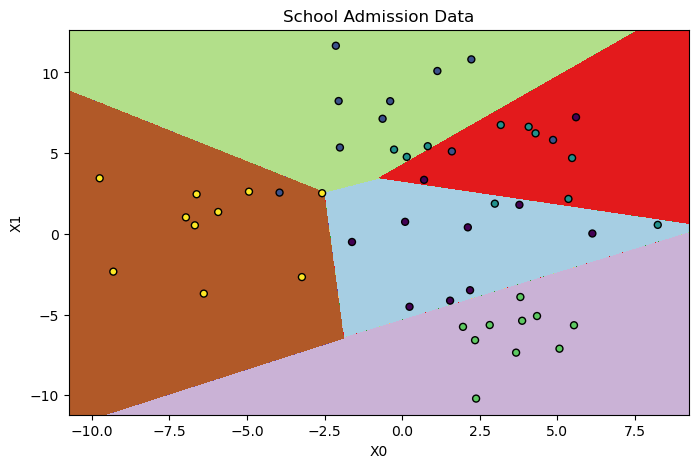

In [191]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z41, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
plt.show()

### Overfitting

In [192]:
degree = 10
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000))
]

losPipe42 = Pipeline(stepsLogisticsRegression)

losPipe42.fit(X4, y4)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=100000, penalty=None))])

In [193]:
losPipe42.score(X4, y4)

1.0

In [194]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.03)
x2grid = np.arange(y_min, y_max, 0.03)
xx, yy = np.meshgrid(x1grid,x2grid)
Z42 = losPipe42.predict(np.c_[xx.ravel(), yy.ravel()])
Z42 = Z42.reshape(xx.shape)

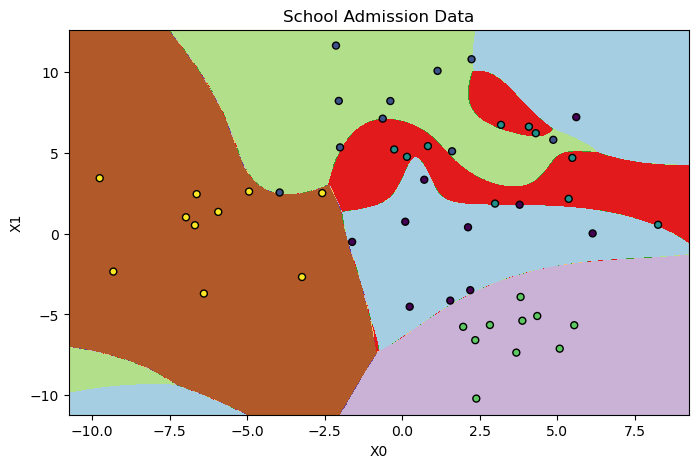

In [195]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z42, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
plt.show()

### Addressing Overfitting

In [196]:
degree = 10
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C= 1, solver='lbfgs', max_iter=100000))
]

losPipe43 = Pipeline(stepsLogisticsRegression)

losPipe43.fit(X4, y4)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=1, max_iter=100000))])

In [197]:
losPipe43.score(X4, y4)

0.9

In [198]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.05)
x2grid = np.arange(y_min, y_max, 0.05)
xx, yy = np.meshgrid(x1grid,x2grid)
Z43 = losPipe43.predict(np.c_[xx.ravel(), yy.ravel()])
Z43 = Z43.reshape(xx.shape)

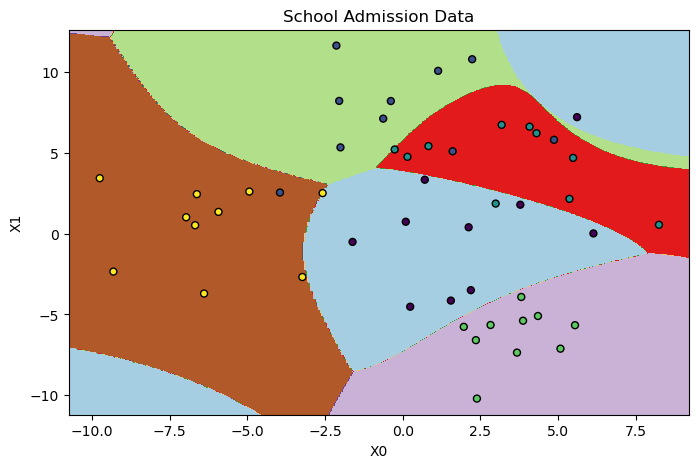

In [199]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z43, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
plt.show()

### Application of Softmax Gradient Descent on Example 4

### Underfitting

In [200]:
degree = 1
polynomial_features41 = PolynomialFeatures(degree=degree, include_bias=False)
X4_poly41 = polynomial_features41.fit_transform(X4)

std_scaler41 = StandardScaler()
X4_norm41 = std_scaler41.fit_transform(X4_poly41)

In [201]:
k = len(np.unique(y4))
k

5

In [202]:
lambdaRegu = 0 
alpha = 0.1
iterations = 10000

In [203]:
coef41, intercept41, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X4_norm41, y4, k, iterations=iterations, 
                                                      alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 4.436562e-01: intercept = [[ 3.48423846  0.22826267  2.5177076  -5.33671644 -0.8934923 ]]: weights = [[ 0.84837928 -0.1403377 ]
 [-1.44476346  5.77099732]
 [ 1.54885191  2.40758784]
 [ 4.39123679 -7.18789115]
 [-5.34370452 -0.85035632]]
best w [[ 0.848379 -1.444763  1.548852  4.391237 -5.343705]
 [-0.140338  5.770997  2.407588 -7.187891 -0.850356]]
best b [[ 3.484238  0.228263  2.517708 -5.336716 -0.893492]]


In [204]:
#Compute accuracy on our training set
y_hat41, _ = my.softmax_predict(X4_norm41, coef41, intercept41)
print('Train Accuracy: %f'%(np.mean(y_hat41.reshape(-1,1) == y4.reshape(-1,1)) * 100))

Train Accuracy: 80.000000


In [205]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features41.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler41.transform(XX_poly)
ZG44, _ = my.softmax_predict(XX_norm, coef41, intercept41)
ZG44 = ZG44.reshape(xx.shape)

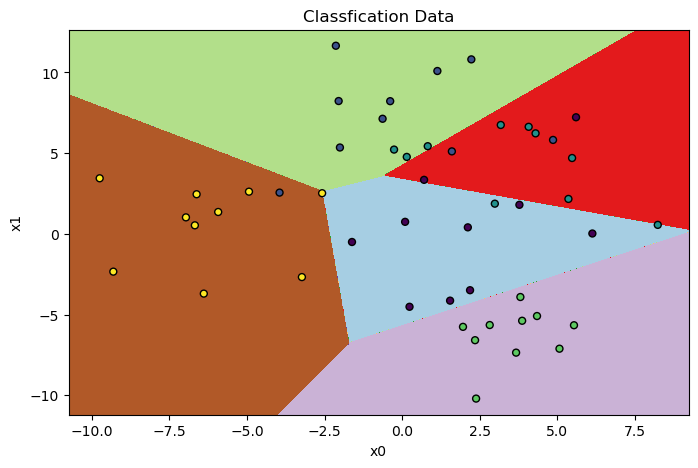

In [206]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG44, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [207]:
degree = 10
polynomial_features42 = PolynomialFeatures(degree=degree, include_bias=False)
X4_poly42 = polynomial_features42.fit_transform(X4)

std_scaler42 = StandardScaler()
X4_norm42 = std_scaler42.fit_transform(X4_poly42)

In [208]:
m,n = X4_norm42.shape

In [209]:
lambdaRegu = 0  
alpha = 0.1
iterations = 800000

In [210]:
## Please wait for a while as there are 800k iterations
## estimated time ~ 3 minutes
start_time = datetime.now()
print(start_time)
coef42, intercept42, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X4_norm42, y4, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)
end_time = datetime.now()
print('Duration:', end_time - start_time)

2024-11-02 11:05:56.500040
iteration 799999: cost = 4.307887e-02: intercept = [[-4.19703296  2.41342689 -2.88431688  1.27927935  3.3886436 ]]: weights = [[-2.71499847e+00 -2.63420076e+00 -2.65357834e+00 -5.02856899e+00
  -3.51431667e+00  2.40800423e+01 -1.11037772e+01  6.82184686e+00
  -3.54422598e+00  9.36166504e+00  6.49190895e+00 -1.71852875e+01
   5.28809353e+00 -6.04496835e+00  6.11546570e-01  2.90130571e+00
   8.74971645e-01  2.61300846e-01  1.66118977e+00 -2.48422944e+00
  -2.55917079e+00 -4.92746078e-01 -1.12229650e+00  1.42765072e+00
   7.53477767e-02  1.20120290e+00 -1.28167083e+00 -5.34925313e+00
  -1.45640878e+00 -1.13213897e+00  1.37258032e+00  1.75247377e+00
   2.13986529e+00  2.96624292e-01 -8.90332818e-02 -3.66112116e+00
  -2.23422051e+00 -3.66735293e-01  2.52571428e-01  2.19477932e+00
   2.15316626e+00  1.90325227e+00  6.33486344e-02  5.55732455e-01
  -4.83649103e+00 -1.36128569e+00 -1.67428845e+00  4.53733888e-01
   1.69910638e+00  2.87490486e+00  2.29645643e+00  1.37

In [211]:
#Compute accuracy on our training set
y_hat42, _ = my.softmax_predict(X4_norm42, coef42, intercept42)
print('Train Accuracy: %f'%(np.mean(y_hat42.reshape(-1,1) == y4.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [212]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.03)
x2grid = np.arange(y_min, y_max, 0.03)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features42.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler42.transform(XX_poly)
ZG45, _ = my.softmax_predict(XX_norm, coef42, intercept42)
ZG45 = ZG45.reshape(xx.shape)

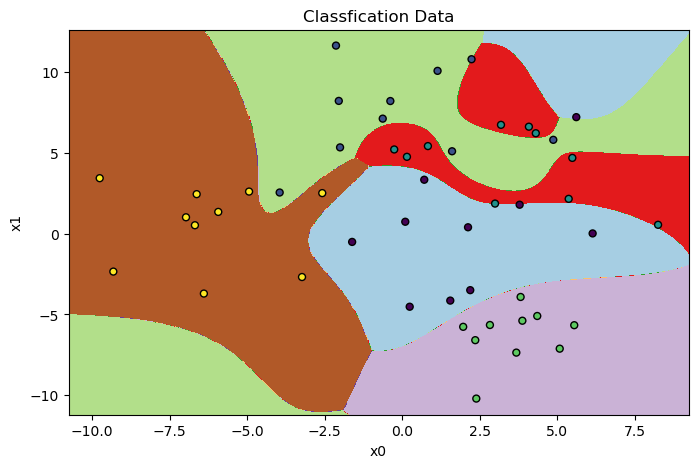

In [213]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG45, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Address Overfitting

In [214]:
degree = 10
polynomial_features43 = PolynomialFeatures(degree=degree, include_bias=False)
X4_poly43 = polynomial_features43.fit_transform(X4)

std_scaler43 = StandardScaler()
X4_norm43 = std_scaler43.fit_transform(X4_poly43)

In [215]:
lambdaRegu = 1  
alpha = 0.01
iterations = 20000

In [216]:
coef43, intercept43, _, _, _ = my.sparse_categorical_softmax_gradient_descent(X4_norm43, y4, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 19999: cost = 4.117378e-01: intercept = [[-0.32382006  0.53602316 -0.03461057 -0.05124823 -0.1263443 ]]: weights = [[ 6.02217038e-01 -6.72630433e-01 -5.09563465e-01  9.94404390e-02
  -8.87070123e-01  1.76637167e-01 -9.06847770e-02 -2.50518955e-01
  -1.62389034e-01 -1.04145489e-01 -2.02058993e-02 -6.67202349e-01
   1.48363370e-01 -2.33401111e-01  1.21180208e-02 -7.60312306e-02
  -1.18263093e-01  1.38826229e-01 -1.09409121e-01 -1.62124660e-02
  -6.45100865e-02 -3.81164931e-02 -1.51686764e-01  1.58452163e-01
  -1.27023559e-01  7.64196720e-02 -5.24705842e-02 -4.89449081e-02
  -4.15210248e-02 -1.44307044e-02  1.38916980e-01  3.94707040e-02
   1.28136774e-01 -1.83953412e-02  7.95098310e-03 -6.10545447e-02
  -2.78715919e-02 -1.22553894e-02  1.08243373e-01  1.01167227e-01
   2.00142100e-01  2.37075572e-02  2.96961721e-02 -4.15010619e-03
  -6.39643111e-02 -2.13659840e-02 -2.19668858e-03  8.16607657e-02
   1.53200787e-01  2.48194522e-01  1.18218773e-01  7.23264161e-02
   1.33464135e-03

In [217]:
#Compute accuracy on our training set
y_hat43, _ = my.softmax_predict(X4_norm43, coef43, intercept43)
print('Train Accuracy: %f'%(np.mean(y_hat43.reshape(-1,1) == y4.reshape(-1,1)) * 100))

Train Accuracy: 90.000000


In [218]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.03)
x2grid = np.arange(y_min, y_max, 0.03)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features43.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler43.transform(XX_poly)
ZG46, _ = my.softmax_predict(XX_norm, coef43, intercept43)
ZG46 = ZG46.reshape(xx.shape)

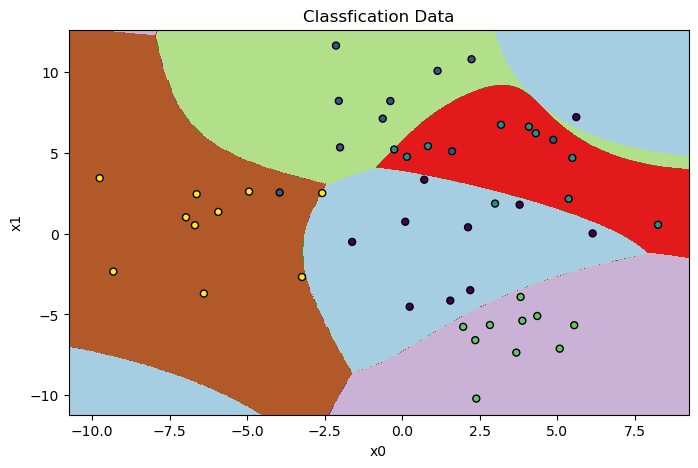

In [219]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG46, cmap=plt.cm.Paired)
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=y4, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Application of Softmax Regression with regularization on Example 5

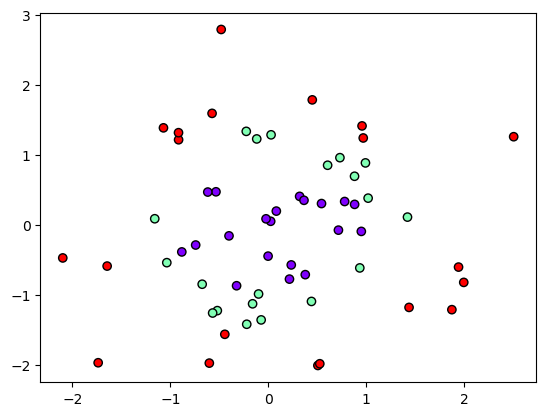

In [220]:
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap='rainbow', edgecolor='k')
plt.show()

In [221]:
X5.shape

(60, 2)

In [222]:
y5.shape

(60,)

### Underfitting

In [223]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe51 = Pipeline(stepsLogisticsRegression)

losPipe51.fit(X5, y5)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [224]:
losPipe51.score(X5, y5)

0.4

In [225]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z51 = losPipe51.predict(np.c_[xx.ravel(), yy.ravel()])
Z51 = Z51.reshape(xx.shape)

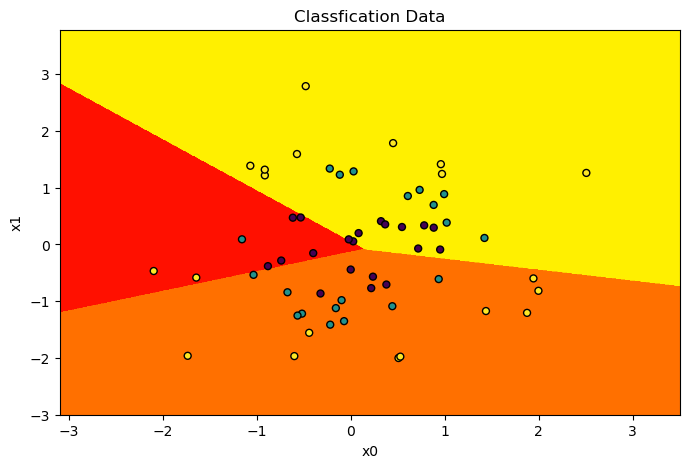

In [226]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z51, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [227]:
degree = 10
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000))
]

losPipe52 = Pipeline(stepsLogisticsRegression)

losPipe52.fit(X5, y5)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=100000, penalty=None))])

In [228]:
losPipe52.score(X5, y5)

1.0

In [229]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z52 = losPipe52.predict(np.c_[xx.ravel(), yy.ravel()])
Z52 = Z52.reshape(xx.shape)

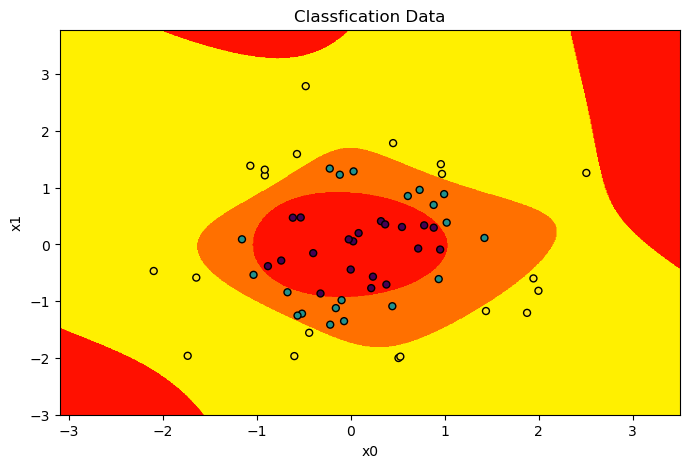

In [230]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z52, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Addressing Overfitting

In [231]:
degree = 10
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C= 0.1, solver='lbfgs', max_iter=100000))
]

losPipe53 = Pipeline(stepsLogisticsRegression)

losPipe53.fit(X5, y5)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.1, max_iter=100000))])

In [232]:
losPipe53.score(X5, y5)

0.8833333333333333

In [233]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z53 = losPipe53.predict(np.c_[xx.ravel(), yy.ravel()])
Z53 = Z53.reshape(xx.shape)

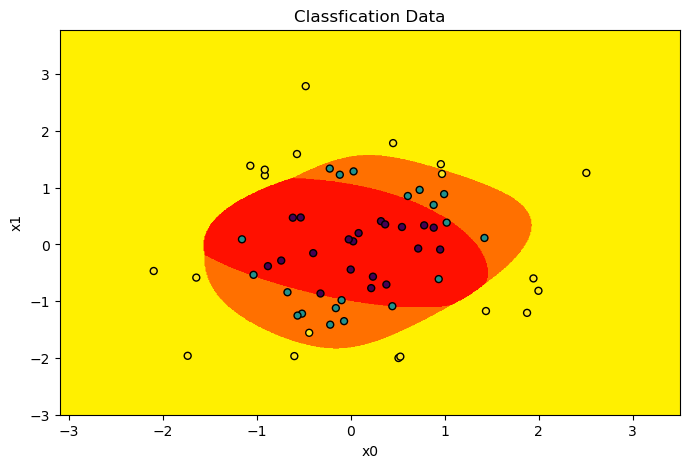

In [234]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z53, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of Softmax Gradient Descent on Example 5

### Underfitting

In [235]:
degree = 1
polynomial_features51 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly51 = polynomial_features51.fit_transform(X5)

std_scaler51 = StandardScaler()
X5_norm51 = std_scaler51.fit_transform(X5_poly51)

In [236]:
k = len(np.unique(y5))
k

3

In [237]:
y5_oh = np.eye(k)[y5]

In [238]:
y5_oh.shape

(60, 3)

In [239]:
lambdaRegu = 0 
alpha = 0.01
iterations = 20000

In [240]:
coef51, intercept51, _, _, _ = my.categorical_softmax_gradient_descent(X5_norm51, y5_oh, k, iterations=iterations, 
                                                      alpha=alpha, reguLambda=lambdaRegu)

iteration 19999: cost = 1.097575e+00: intercept = [[ 0.00088266 -0.00045577 -0.00042689]]: weights = [[-0.01764475  0.0047463 ]
 [ 0.00011765 -0.05470271]
 [ 0.0175271   0.0499564 ]]
best w [[-0.017645  0.000118  0.017527]
 [ 0.004746 -0.054703  0.049956]]
best b [[ 0.000883 -0.000456 -0.000427]]


In [241]:
#Compute accuracy on our training set
y_hat51, _ = my.softmax_predict(X5_norm51, coef51, intercept51)
print('Train Accuracy: %f'%(np.mean(y_hat51.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 40.000000


In [242]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features51.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler51.transform(XX_poly)
ZG54, _ = my.softmax_predict(XX_norm, coef51, intercept51)
ZG54 = ZG54.reshape(xx.shape)

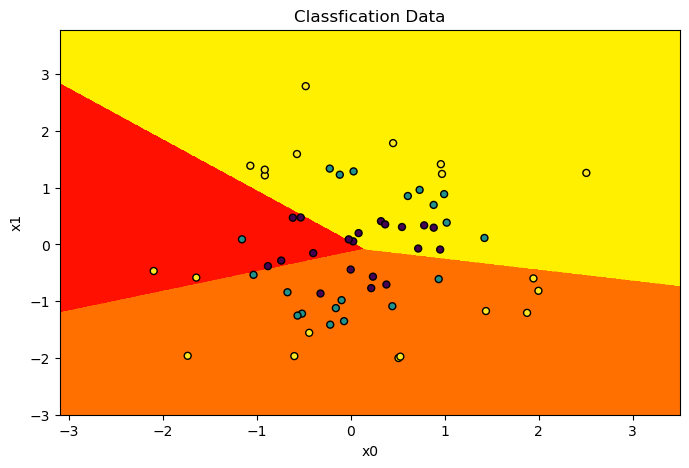

In [243]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG54, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [244]:
degree = 10
polynomial_features52 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly52 = polynomial_features52.fit_transform(X5)

std_scaler52 = StandardScaler()
X5_norm52 = std_scaler52.fit_transform(X5_poly52)

In [245]:
m,n = X5_norm52.shape

In [246]:
lambdaRegu = 0  
alpha = 0.1
iterations = 10000

In [247]:
start_time = datetime.now()
coef52, intercept52, _, _, _ = my.categorical_softmax_gradient_descent(X5_norm52, y5_oh, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)
end_time = datetime.now()
print('Duration:', end_time - start_time)

iteration 9999: cost = 5.955530e-02: intercept = [[-2.92328295  0.70958234  2.21370061]]: weights = [[ 1.98253045e-01 -2.10002627e-01 -6.31662211e+00 -8.90982716e-01
  -8.74156178e+00  5.78154795e-01 -7.68527181e-02 -1.69118038e+00
   5.50617461e-01 -1.69136752e+00  1.97504802e-01 -1.86008640e+00
  -7.59272834e-01 -1.37918610e+00  4.94387830e-01 -2.72548392e-02
  -3.31040294e-01 -7.66664486e-02 -3.26752665e-01  3.03174845e-01
  -2.06083510e-02  2.86987946e-01  1.87525542e-01  2.39724017e-01
   1.00791982e-01 -2.44232952e-01  1.61294654e-01  4.01398611e-01
   1.26034920e-01  2.23138339e-01 -2.93343701e-02 -1.68232396e-01
  -1.89436463e-01 -3.62554783e-01  2.89307402e-01  3.82264667e-01
   3.27536837e-01  4.84946687e-01  4.02345661e-01  4.95415086e-01
   3.44393618e-01  5.33911408e-01 -2.65593171e-01  3.87142098e-01
   3.75095472e-01  2.33810836e-01  3.46557126e-01  1.29094265e-01
   6.50930588e-02 -2.14017192e-01 -3.10378546e-01 -6.92408539e-02
  -3.96956170e-01  3.22136568e-01  4.45537

In [248]:
#Compute accuracy on our training set
y_hat52, _ = my.softmax_predict(X5_norm52, coef52, intercept52)
print('Train Accuracy: %f'%(np.mean(y_hat52.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [249]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features52.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler52.transform(XX_poly)
ZG55, _ = my.softmax_predict(XX_norm, coef52, intercept52)
ZG55 = ZG55.reshape(xx.shape)

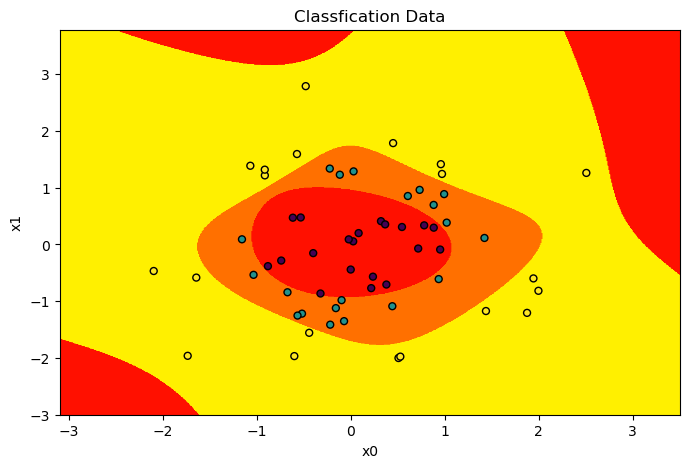

In [250]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG55, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Address Overfitting

In [251]:
degree = 10
polynomial_features53 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly53 = polynomial_features53.fit_transform(X5)

std_scaler53 = StandardScaler()
X5_norm53 = std_scaler53.fit_transform(X5_poly53)

In [252]:
lambdaRegu = 10  
alpha = 0.01
iterations = 10000

In [253]:
coef53, intercept53, _, _, _ = my.categorical_softmax_gradient_descent(X5_norm53, y5_oh, k, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 9999: cost = 6.725663e-01: intercept = [[-0.23412701  0.09071776  0.14340926]]: weights = [[ 2.86704301e-02 -3.99793760e-02 -3.07839060e-01 -8.90266751e-02
  -6.00526821e-01 -2.23345541e-02 -3.90829015e-03  1.36713078e-02
  -5.67277076e-03 -1.38437555e-01 -4.17652553e-03 -1.92826993e-01
  -1.81197284e-02 -1.86949117e-01 -1.18629347e-02  2.64492228e-02
  -1.69475654e-02 -2.21063205e-02  1.69728064e-02  6.78331959e-03
  -6.46472861e-02  4.21559457e-03 -5.10358909e-02  9.15225239e-03
  -9.02836201e-02  1.36457513e-03 -5.39837188e-02 -5.77099410e-03
   2.18368927e-02 -8.59031100e-03  2.28079168e-03 -4.64923274e-03
  -1.00932776e-02  3.95855232e-03  5.61615982e-03 -3.32456074e-02
   3.50095288e-03 -1.84114397e-02  6.99359092e-03 -2.41150455e-02
   6.69821431e-03 -4.08371923e-02  2.38928694e-03 -1.72828202e-02
  -2.65840968e-03  1.37052801e-02 -4.33588846e-03  6.09288583e-03
  -4.66123925e-03 -2.18167616e-03 -9.15656988e-04 -1.00958348e-03
  -7.21412960e-04  3.40743699e-03 -1.85525

In [254]:
#Compute accuracy on our training set
y_hat53, _ = my.softmax_predict(X5_norm53, coef53, intercept53)
print('Train Accuracy: %f'%(np.mean(y_hat53.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 88.333333


In [255]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features53.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler53.transform(XX_poly)
ZG56, _ = my.softmax_predict(XX_norm, coef53, intercept53)
ZG56 = ZG56.reshape(xx.shape)

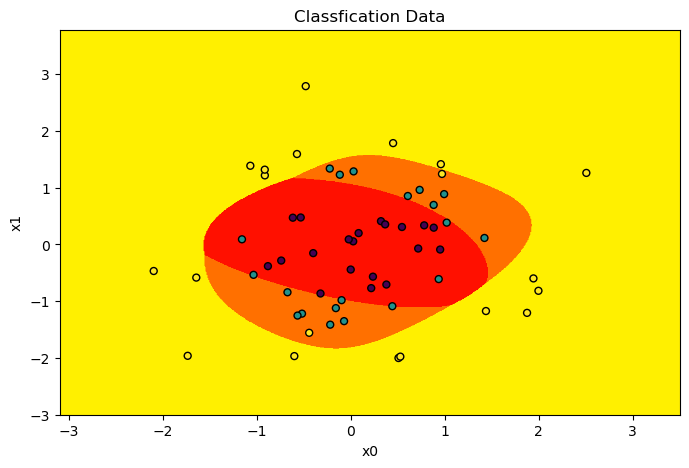

In [256]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG56, cmap=plt.cm.autumn)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR on Example 5

### OvR Underfit

In [257]:
degree = 1
polynomial_features501 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly501 = polynomial_features501.fit_transform(X5)
std_scaler501 = StandardScaler()
X5_norm501 = std_scaler501.fit_transform(X5_poly501)

In [258]:
GD_result501 = my.ovrLogisticRegression(X5_norm501, y5, alpha = 0.1, iterations=10000, reguLambda=0)
y_predict501, _ = my.ovrMultiClassPredict(X5_norm501, GD_result501)

Classifying Class: 0
iteration 9999: cost = 6.3644e-01: intercept = -6.9326e-01: weights = [-0.02621444  0.00690362]
best w [-0.0262  0.0069]
best b -0.6933
Classifying Class: 1
iteration 9999: cost = 6.3577e-01: intercept = -6.9427e-01: weights = [ 0.00024518 -0.08201223]
best w [ 0.0002 -0.082 ]
best b -0.6943
Classifying Class: 2
iteration 9999: cost = 6.3578e-01: intercept = -6.9425e-01: weights = [0.02634845 0.07477742]
best w [0.0263 0.0748]
best b -0.6942


In [259]:
print('Train Accuracy: %f'%(np.mean(y_predict501.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 40.000000


In [260]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features501.transform(zz)
zz_norm = std_scaler501.transform(zz_poly)
ZG501, _ = my.ovrMultiClassPredict(zz_norm, GD_result501)
ZG501 = ZG501.reshape(xx.shape)

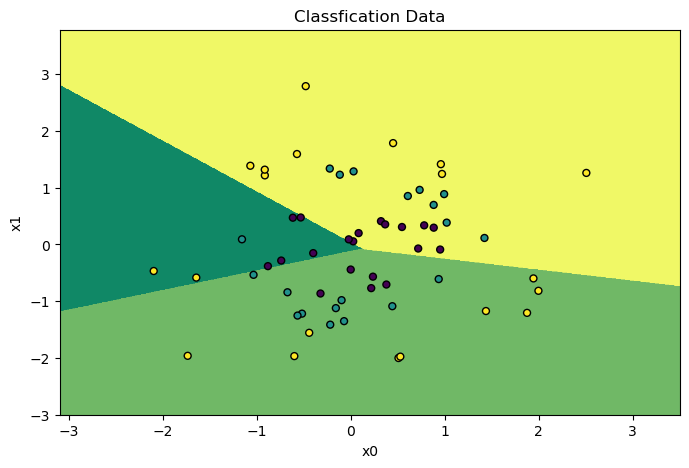

In [261]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG501, cmap=plt.cm.summer)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### OvR Overfit

In [262]:
degree = 10
polynomial_features502 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly502 = polynomial_features502.fit_transform(X5)
std_scaler502 = StandardScaler()
X5_norm502 = std_scaler502.fit_transform(X5_poly502)

In [263]:
start_time = datetime.now()
print(start_time)

GD_result502 = my.ovrLogisticRegression(X5_norm502, y5, alpha = 0.1, iterations=10000, reguLambda=0)
y_predict502, _ = my.ovrMultiClassPredict(X5_norm502, GD_result502)

end_time = datetime.now()
print('Duration:', end_time - start_time)

2024-11-02 11:09:46.667643
Classifying Class: 0
iteration 9999: cost = 6.0478e-02: intercept = -5.7119e+00: weights = [ -0.14786027   0.11974718  -7.19773744  -1.01745994 -10.03751934
   0.62521157  -0.22008838  -1.86783055   0.4976755   -1.81264403
   0.13007462  -1.95672376  -0.70885751  -1.42670677   0.579559
  -0.14747246  -0.24950959  -0.23487537  -0.34862126   0.32108808
   0.09013902   0.26639726   0.3063609    0.27349941   0.21985578
  -0.29779381   0.34304363   0.47832805   0.06971071   0.32987795
  -0.10333053  -0.12450165  -0.27226846  -0.45289807   0.37261933
   0.52068551   0.34188948   0.61540149   0.42654093   0.60910247
   0.38842311   0.71559375  -0.38738579   0.57765928   0.44431821
   0.22246497   0.4387884    0.10995538   0.124549    -0.27495445
  -0.33208952  -0.06933445  -0.52724685   0.43979773   0.56751695
   0.38492829   0.57940675   0.43784757   0.67423577   0.5161953
   0.58947991   0.3161436    0.7798676   -0.46355838   0.57632222]
best w [ -0.1479   0.1197 

In [264]:
print('Train Accuracy: %f'%(np.mean(y_predict502.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [265]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features502.transform(zz)
zz_norm = std_scaler502.transform(zz_poly)
ZG502, _ = my.ovrMultiClassPredict(zz_norm, GD_result502)
ZG502 = ZG502.reshape(xx.shape)

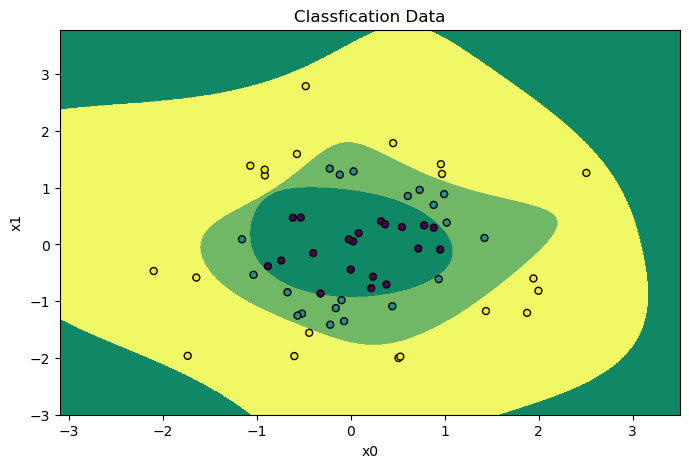

In [266]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG502, cmap=plt.cm.summer)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### OvR Address Overfitting

In [267]:
degree = 10
polynomial_features503 = PolynomialFeatures(degree=degree, include_bias=False)
X5_poly503 = polynomial_features503.fit_transform(X5)
std_scaler503 = StandardScaler()
X5_norm503 = std_scaler503.fit_transform(X5_poly503)

In [268]:
start_time = datetime.now()
print(start_time)

GD_result503 = my.ovrLogisticRegression(X5_norm503, y5, alpha = 0.1, iterations=10000, reguLambda=3.2)
y_predict503, _ = my.ovrMultiClassPredict(X5_norm503, GD_result503)

end_time = datetime.now()
print('Duration:', end_time - start_time)

2024-11-02 11:09:51.930881
Classifying Class: 0
iteration 9999: cost = 4.1218e-01: intercept = -1.5631e+00: weights = [ 3.30298676e-02 -6.14539796e-02 -7.29306361e-01 -2.32096736e-01
 -1.36495272e+00 -5.89648545e-02 -2.01435202e-02  2.86337138e-02
 -6.39276049e-03 -3.06333558e-01 -1.69703961e-02 -4.14246252e-01
 -3.92094060e-02 -3.88606803e-01 -2.88192512e-02  4.31831611e-02
 -3.59551102e-02 -4.43155094e-02  5.09174898e-02  8.90274873e-03
 -1.31169949e-01  6.50358818e-03 -1.05211238e-01  2.05585813e-02
 -1.76162576e-01  7.13849148e-03 -9.99075698e-02 -1.34789666e-02
  3.80819613e-02 -1.75009880e-02  4.50140971e-03 -5.73929572e-03
 -2.24910104e-02  1.66160396e-02  6.47192838e-03 -6.29443410e-02
  6.31300751e-03 -3.60449326e-02  1.50705067e-02 -4.82195576e-02
  1.67972610e-02 -7.12981119e-02  6.39401211e-03 -2.80719104e-02
 -6.01629499e-03  2.41896551e-02 -8.79544524e-03  1.19741962e-02
 -8.92527235e-03 -3.83303354e-03  9.90738420e-04 -5.88683276e-03
  2.14732532e-03  3.76756367e-03 -3.3

In [269]:
print('Train Accuracy: %f'%(np.mean(y_predict503.reshape(-1,1) == y5.reshape(-1,1)) * 100))

Train Accuracy: 88.333333


In [270]:
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features503.transform(zz)
zz_norm = std_scaler503.transform(zz_poly)
ZG503, _ = my.ovrMultiClassPredict(zz_norm, GD_result503)
ZG503 = ZG503.reshape(xx.shape)

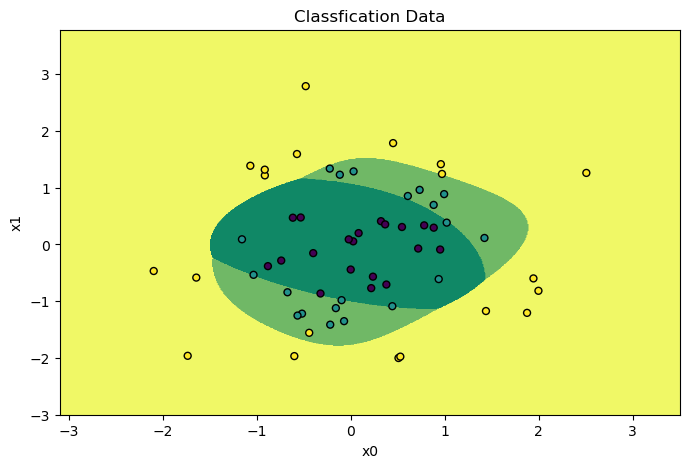

In [271]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG503, cmap=plt.cm.summer)
plt.scatter(X5[:, 0], X5[:, 1], marker="o", c=y5, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## End